In [ ]:
import dandelion as ddl
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu
import mudata as md
from mudata import MuData
import numpy as np
import warnings
import os

import scirpy as ir
from cycler import cycler

from matplotlib import cm as mpl_cm
from matplotlib import pyplot as plt

from palmotif import compute_motif, svg_logo
import seaborn as sb
warnings.simplefilter(action="ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore")
ddl.logging.print_header()

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

# Opcional: Desactivar warnings específicos (ejemplo: FutureWarnings de anndata)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.errors.DtypeWarning)

# Si usas tqdm y deseas evitar sus warnings
from tqdm import TqdmWarning
warnings.simplefilter(action="ignore", category=TqdmWarning)

In [2]:
mdata_file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/mudata_harmony_conTCR_KNN_leiden.h5mu"
mdata = mu.read(mdata_file)

In [ ]:
# Extraer el objeto AnnData correspondiente a 'gex'
adata_gex = mdata.mod['gex']

##### Primero vamos a obtener los diferentes UMAPS por tumor

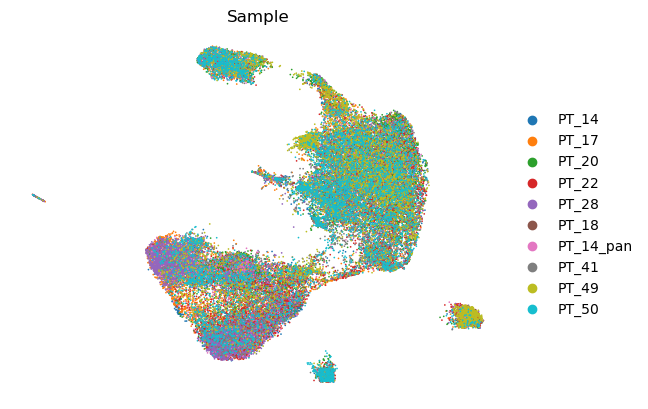

In [27]:
sc.pl.umap(
    adata_gex,
    color='Sample',         # Colorear por muestra
    size=6,                 # Tamaño de puntos equilibrado
    frameon=False          # Sin borde para un aspecto más limpios)'
)

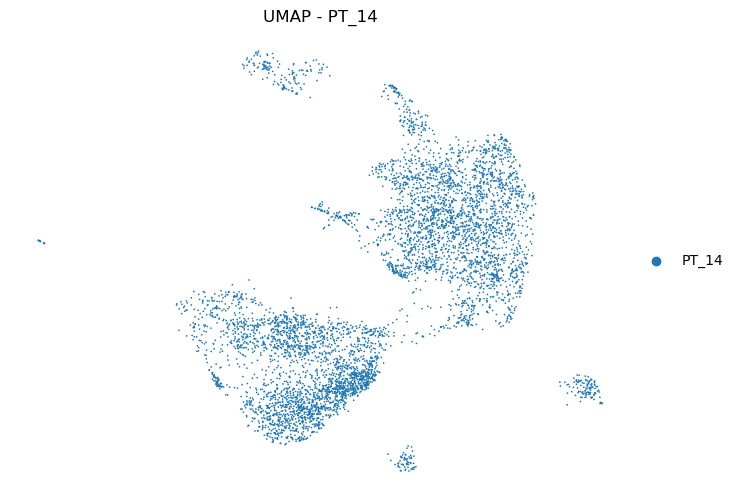

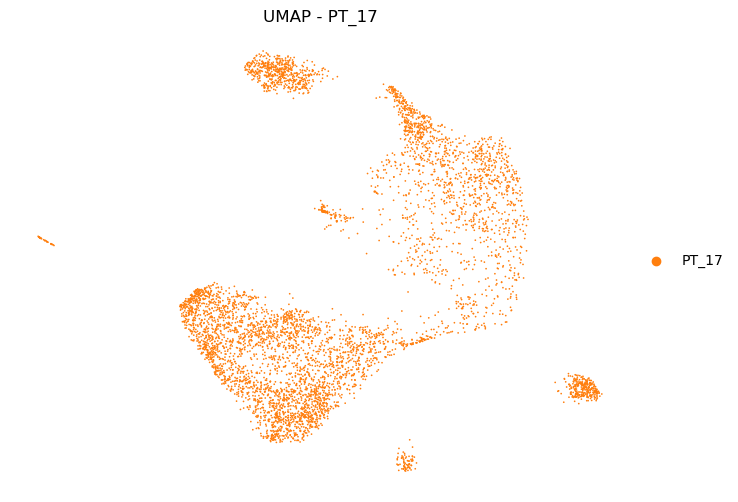

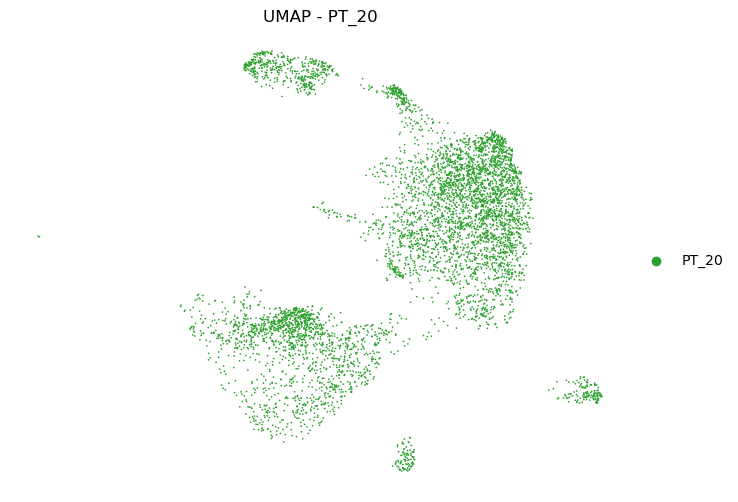

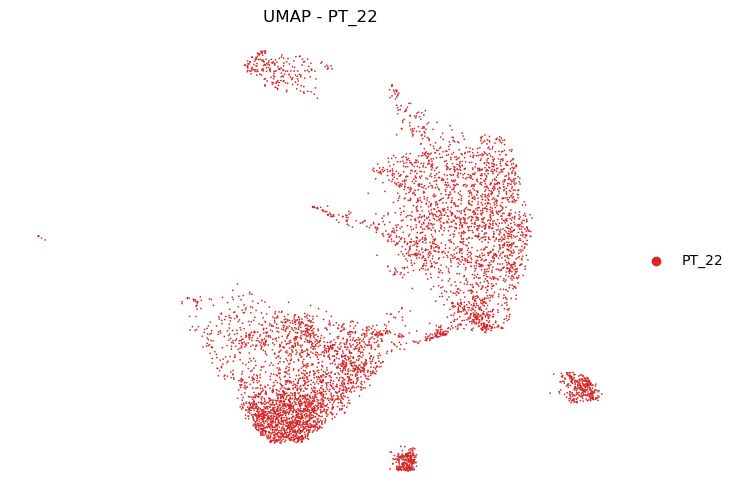

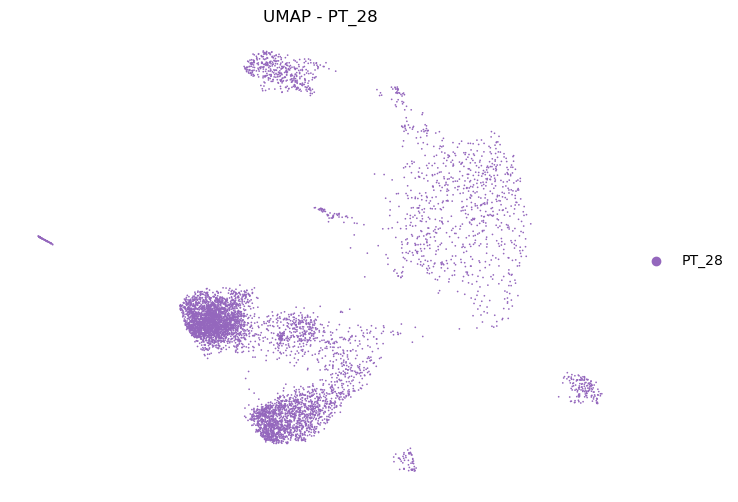

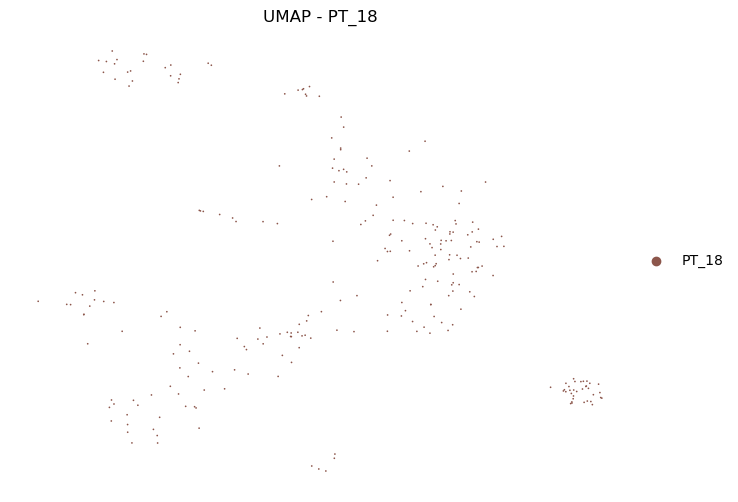

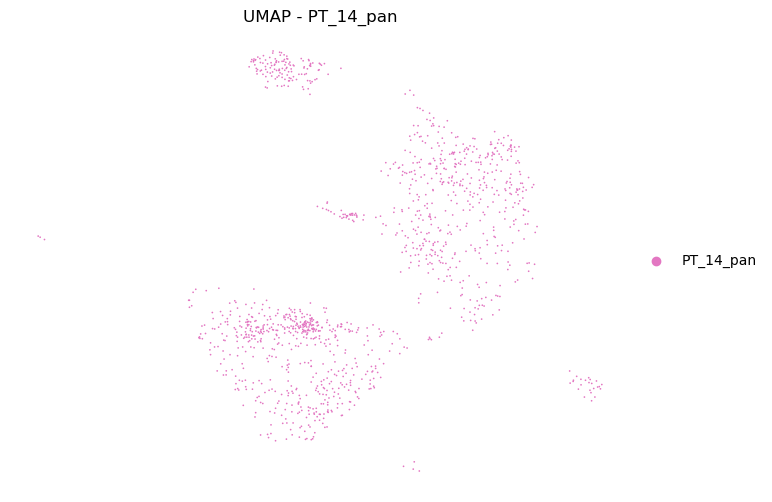

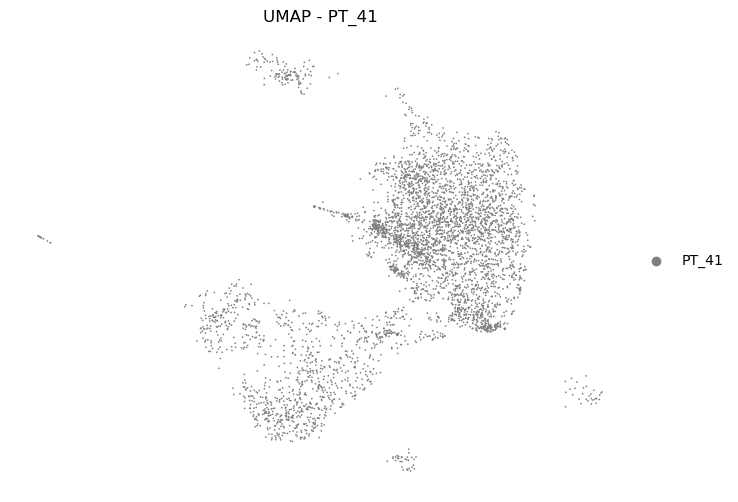

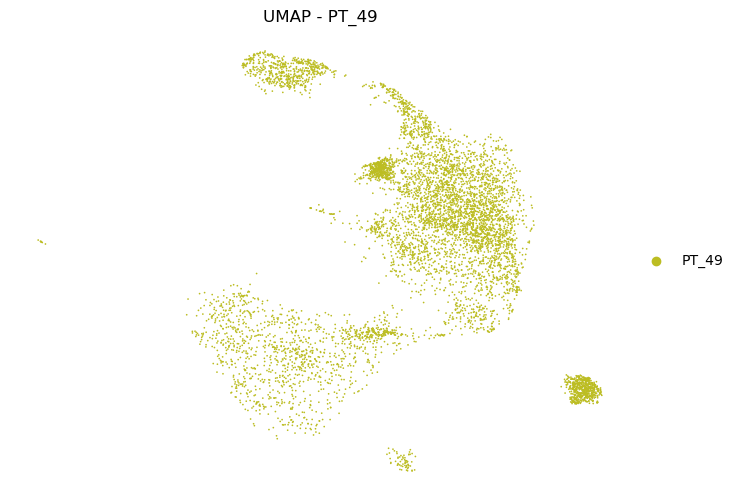

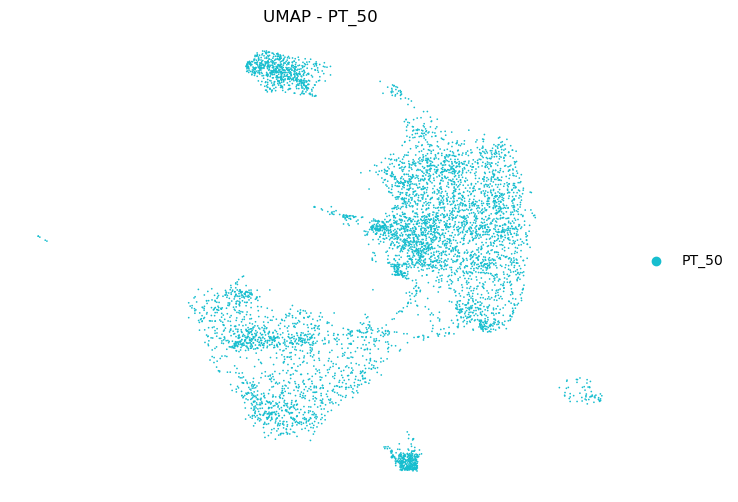

Gráficos mostrados como imágenes individuales.


In [40]:
import scanpy as sc
import matplotlib.pyplot as plt

# Extraer el objeto AnnData correspondiente a 'gex'
adata_gex = mdata.mod['gex']

# Verificar que los datos de UMAP están disponibles
if 'X_umap' not in adata_gex.obsm:
    raise ValueError("No se encontró 'X_umap' en obsm de adata_gex.")

# Definir los pacientes
patients = adata_gex.obs['Sample'].unique()

# Graficar UMAP para cada paciente y mostrarlo
for patient in patients:
    sub_adata = adata_gex[adata_gex.obs['Sample'] == patient]
    
    # Crear la figura para el gráfico
    fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño según prefieras

    # Graficar el UMAP para el paciente
    sc.pl.umap(
        sub_adata,
        color='Sample',  # Colorear por paciente
        size=6,          # Tamaño de los puntos
        frameon=False,   # Sin bordes
        ax=ax,           # Asignar el gráfico al panel correspondiente
        show=False       # Para evitar que `sc.pl.umap` muestre cada gráfico individualmente
    )
    ax.set_title(f'UMAP - {patient}')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')

    # Mostrar la imagen en Jupyter
    plt.show()  # Muestra el gráfico

print("Gráficos mostrados como imágenes individuales.")



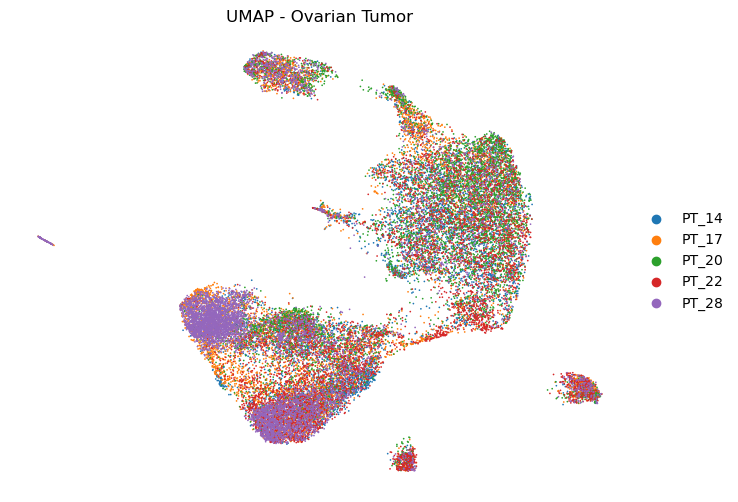

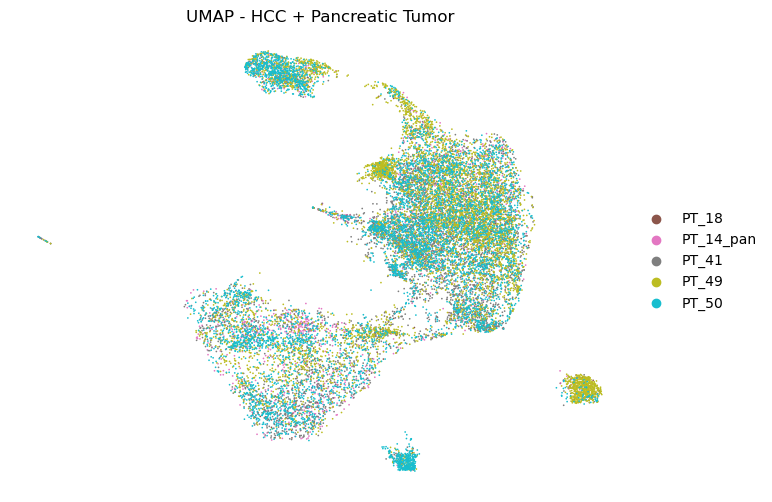

Gráficos de tumores Ovarian y HCC+Pancreatic mostrados.


In [41]:
import scanpy as sc
import matplotlib.pyplot as plt

# Extraer el objeto AnnData correspondiente a 'gex'
adata_gex = mdata.mod['gex']

# Verificar que los datos de UMAP están disponibles
if 'X_umap' not in adata_gex.obsm:
    raise ValueError("No se encontró 'X_umap' en obsm de adata_gex.")

# Definir los pacientes por tipo de tumor
ovarian = ['PT_14', 'PT_17', 'PT_20', 'PT_22', 'PT_28']
hcc_pancreatic = ['PT_18', 'PT_41', 'PT_49', 'PT_50', 'PT_14_pan']

# Etiquetar el tipo de tumor
adata_gex.obs['Tumor'] = 'Other'
adata_gex.obs.loc[adata_gex.obs['Sample'].isin(ovarian), 'Tumor'] = 'Ovarian'
adata_gex.obs.loc[adata_gex.obs['Sample'].isin(hcc_pancreatic), 'Tumor'] = 'HCC+Pancreatic'

# Graficar UMAP para el grupo Ovarian
sub_adata_ovarian = adata_gex[adata_gex.obs['Tumor'] == 'Ovarian']

# Crear la figura para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el UMAP para el tumor Ovarian
sc.pl.umap(
    sub_adata_ovarian,
    color='Sample',  # Colorear por paciente
    size=6,          # Tamaño de los puntos
    frameon=False,   # Sin bordes
    ax=ax,           # Asignar el gráfico al panel correspondiente
    show=False       # Para evitar que `sc.pl.umap` muestre el gráfico
)
ax.set_title('UMAP - Ovarian Tumor')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

# Mostrar el gráfico para Ovarian
plt.show()

# Graficar UMAP para el grupo HCC+Pancreatic
sub_adata_hcc_pancreatic = adata_gex[adata_gex.obs['Tumor'] == 'HCC+Pancreatic']

# Crear la figura para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el UMAP para el tumor HCC+Pancreatic
sc.pl.umap(
    sub_adata_hcc_pancreatic,
    color='Sample',  # Colorear por paciente
    size=6,          # Tamaño de los puntos
    frameon=False,   # Sin bordes
    ax=ax,           # Asignar el gráfico al panel correspondiente
    show=False       # Para evitar que `sc.pl.umap` muestre el gráfico
)
ax.set_title('UMAP - HCC + Pancreatic Tumor')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

# Mostrar el gráfico para HCC + Pancreatic
plt.show()

print("Gráficos de tumores Ovarian y HCC+Pancreatic mostrados.")


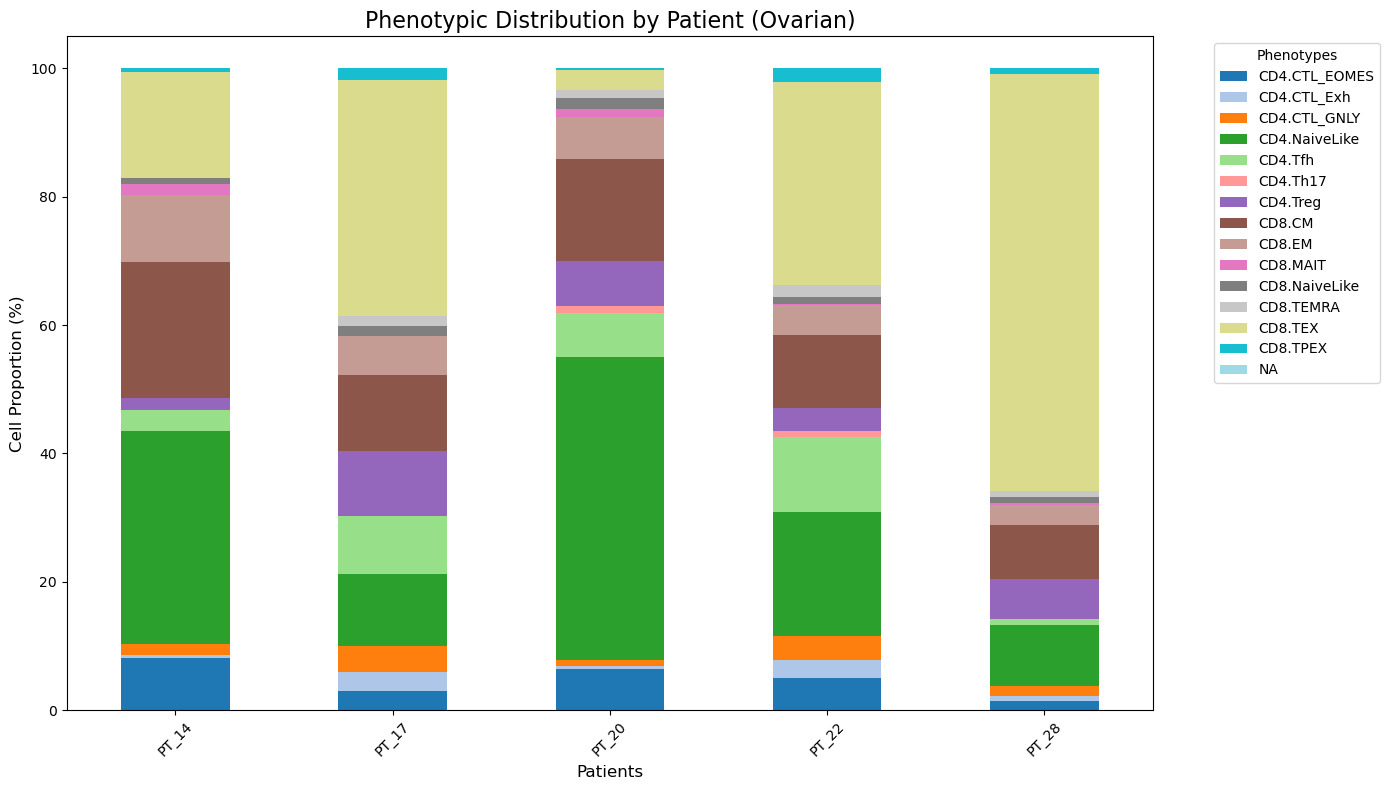

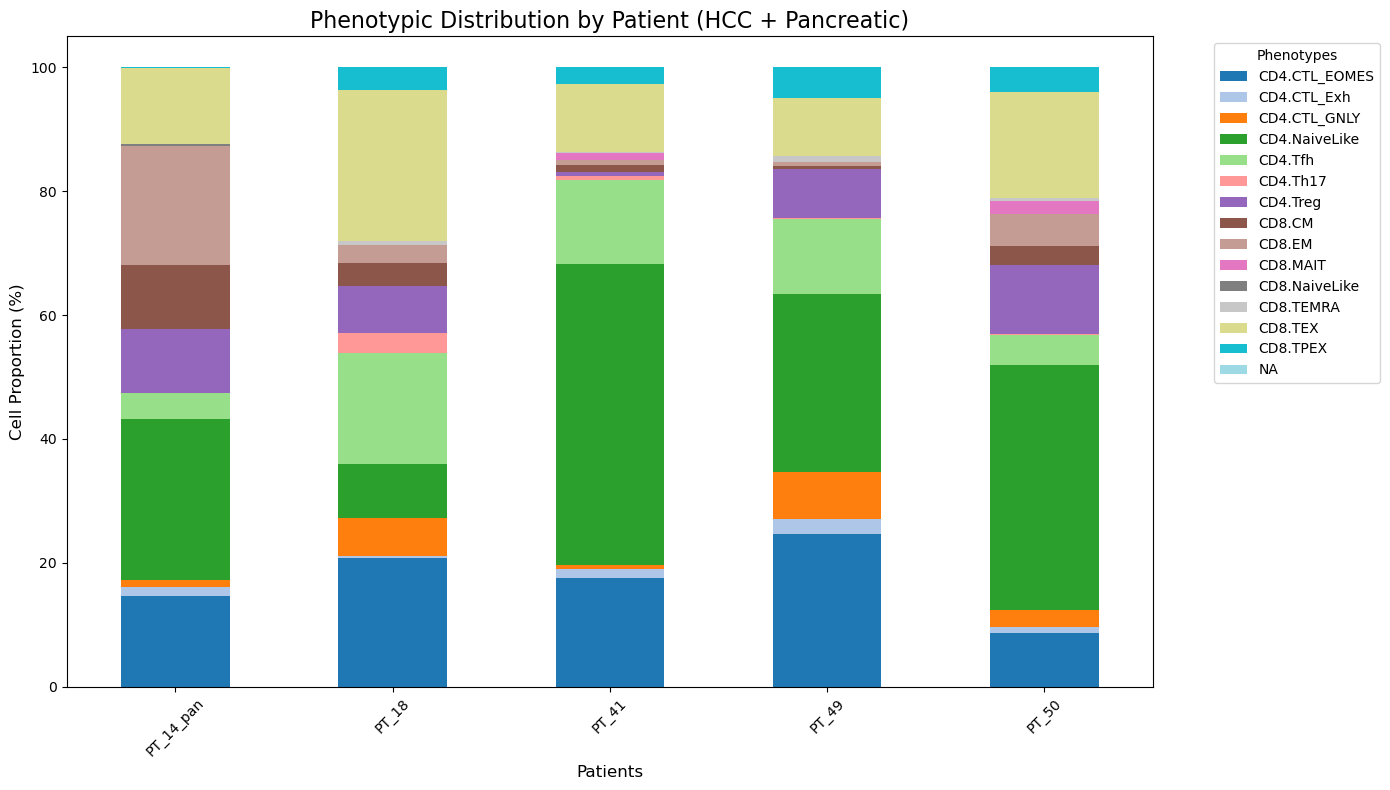

In [49]:
import mudata as mu
import pandas as pd
import matplotlib.pyplot as plt

# Load the MuData file
mdata_file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/mudata_harmony_conTCR_KNN_leiden.h5mu"
mdata = mu.read(mdata_file)

# Access data within the 'airr' module
airr_obs = mdata.mod['airr'].obs
gex_obs = mdata.mod['gex'].obs

# Verify that 'ATLAS_TIL_KNN' exists in 'gex.obs'
if 'ATLAS_TIL_KNN' not in gex_obs.columns:
    raise ValueError("The 'ATLAS_TIL_KNN' column is not in 'gex.obs'.")

# Copy 'ATLAS_TIL_KNN' column to 'airr.obs' if it doesn't exist
if 'ATLAS_TIL_KNN' not in airr_obs.columns:
    atlas_til_knn = gex_obs['ATLAS_TIL_KNN']
    insert_position = airr_obs.columns.get_loc('ATLAS_TIL_score') + 1
    airr_obs.insert(insert_position, 'ATLAS_TIL_KNN', atlas_til_knn.values)

# Verify that 'sample' exists in 'airr.obs'
if 'sample' not in airr_obs.columns:
    raise ValueError("The 'sample' column is not in 'airr.obs'. Please check the data structure.")

# Extract the necessary data
df = airr_obs[['sample', 'ATLAS_TIL_KNN']].copy()

# Separate patients into two groups
ovarian_patients = ['PT_14', 'PT_17', 'PT_20', 'PT_22', 'PT_28']
hcc_pancreatic_patients = ['PT_18', 'PT_41', 'PT_49', 'PT_50', 'PT_14_pan']

# Filter the DataFrame for Ovarian patients
df_ovarian = df[df['sample'].isin(ovarian_patients)].copy()

# Filter the DataFrame for HCC + Pancreatic patients
df_hcc_pancreatic = df[df['sample'].isin(hcc_pancreatic_patients)].copy()

# Calculate the percentage distribution of phenotypes per patient, including NA values
def calculate_distribution(df):
    # Percentage distribution per patient
    distribution = pd.crosstab(df['sample'], df['ATLAS_TIL_KNN'], normalize='index') * 100

    # Handle NA values
    na_counts = df['sample'].value_counts() - df.dropna(subset=['ATLAS_TIL_KNN'])['sample'].value_counts()
    distribution['NA'] = (na_counts / df['sample'].value_counts()) * 100
    distribution = distribution.fillna(0)  # Replace possible NaN values

    # Normalize rows so that each bar sums to 100%
    distribution = distribution.div(distribution.sum(axis=1), axis=0) * 100

    return distribution

# Calculate the distribution for both groups
distribution_ovarian = calculate_distribution(df_ovarian)
distribution_hcc_pancreatic = calculate_distribution(df_hcc_pancreatic)

# Create stacked bar charts for both groups

# Ovarian
fig, ax = plt.subplots(figsize=(14, 8))
bars_ovarian = distribution_ovarian.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
plt.title('Phenotypic Distribution by Patient (Ovarian)', fontsize=16)
plt.xlabel('Patients', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Phenotypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# HCC + Pancreatic
fig, ax = plt.subplots(figsize=(14, 8))
bars_hcc_pancreatic = distribution_hcc_pancreatic.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
plt.title('Phenotypic Distribution by Patient (HCC + Pancreatic)', fontsize=16)
plt.xlabel('Patients', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Phenotypes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



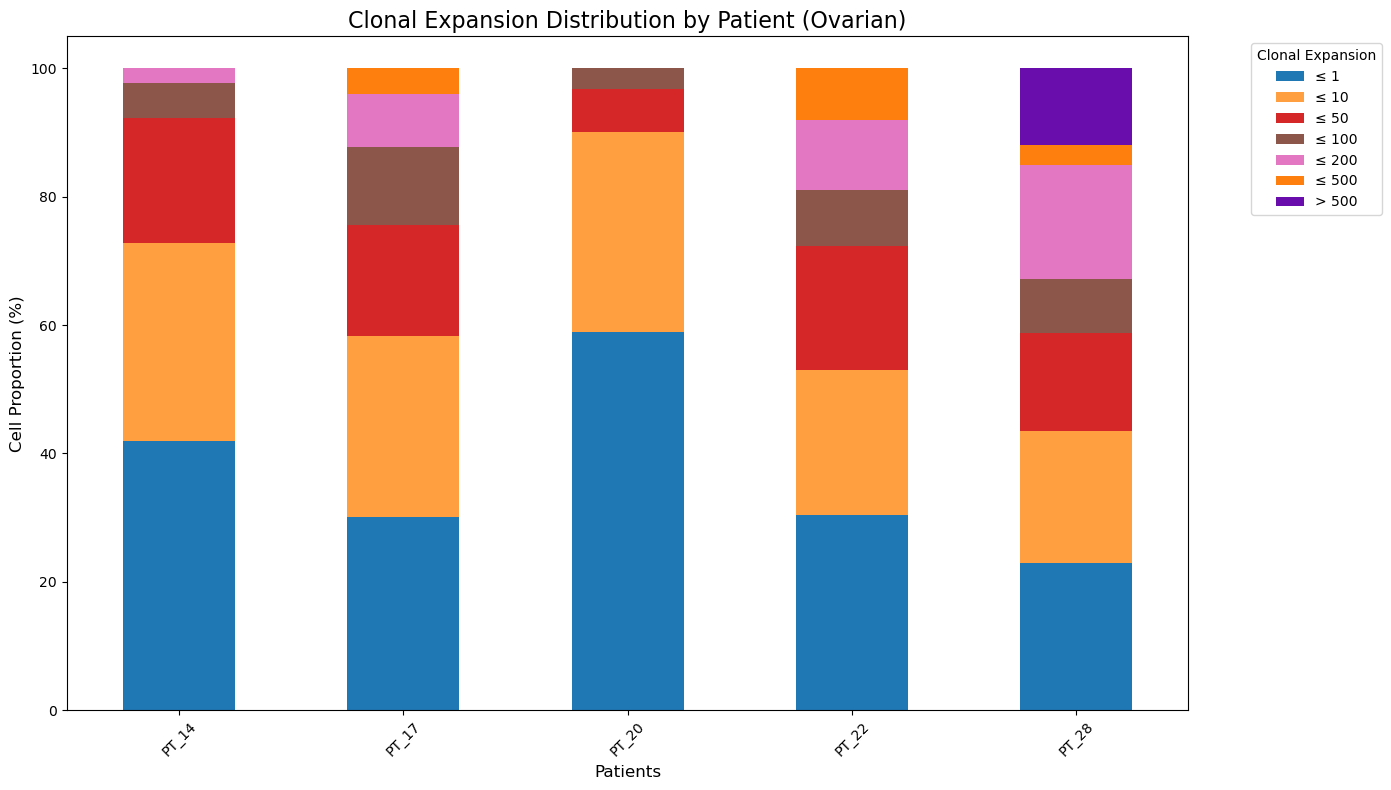

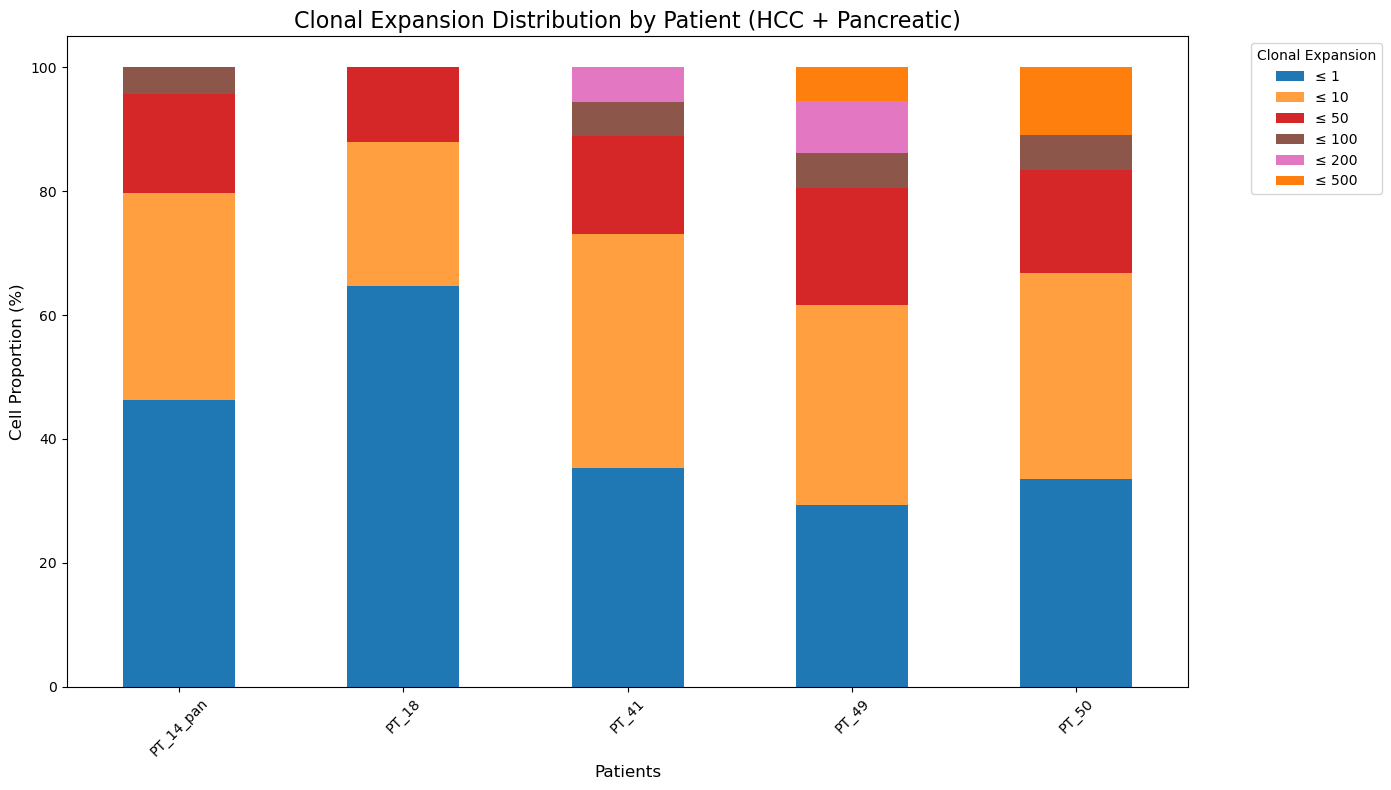

In [50]:
import mudata as mu
import pandas as pd
import matplotlib.pyplot as plt

# Load the MuData file
mdata_file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/mudata_harmony_conTCR_KNN_leiden.h5mu"
mdata = mu.read(mdata_file)

# Access data within the 'airr' module
airr_obs = mdata.mod['airr'].obs

# Verify that 'clonal_expansion' exists in 'airr.obs'
if 'clonal_expansion' not in airr_obs.columns:
    raise ValueError("The 'clonal_expansion' column is not in 'airr.obs'.")

# Separate patients into two groups
ovarian_patients = ['PT_14', 'PT_17', 'PT_20', 'PT_22', 'PT_28']
hcc_pancreatic_patients = ['PT_18', 'PT_41', 'PT_49', 'PT_50', 'PT_14_pan']

# Filter the DataFrame for Ovarian patients
df_ovarian = airr_obs[airr_obs['sample'].isin(ovarian_patients)].copy()

# Filter the DataFrame for HCC + Pancreatic patients
df_hcc_pancreatic = airr_obs[airr_obs['sample'].isin(hcc_pancreatic_patients)].copy()

# Calculate the percentage distribution of clonal expansion per patient
def calculate_clonal_distribution(df):
    # Percentage distribution per patient
    clonal_distribution = pd.crosstab(df['sample'], df['clonal_expansion'], normalize='index') * 100

    # Order categories (dynamically, only the ones present)
    category_order = ['≤ 1', '≤ 10', '≤ 50', '≤ 100', '≤ 200', '≤ 500', '> 500']
    
    # Check which categories are present in the data and filter out the missing ones
    present_categories = [cat for cat in category_order if cat in clonal_distribution.columns]
    clonal_distribution = clonal_distribution[present_categories]

    return clonal_distribution, present_categories

# Calculate the distribution for both groups
clonal_distribution_ovarian, present_categories_ovarian = calculate_clonal_distribution(df_ovarian)
clonal_distribution_hcc_pancreatic, present_categories_hcc_pancreatic = calculate_clonal_distribution(df_hcc_pancreatic)

# Custom colors
custom_colors = {
    "≤ 1": "#1f77b4",   # Blue
    "≤ 10": "#ff9f40",  # Light Orange
    "≤ 50": "#d62728",  # Dark Red
    "≤ 100": "#8c564b", # Brown
    "≤ 200": "#e377c2", # Pink
    "≤ 500": "#ff7f0e", # Strong Orange
    "> 500": "#6a0dad"  # Dark Purple
}

# Filter colors based on the present categories
colors_ovarian = [custom_colors[cat] for cat in present_categories_ovarian]
colors_hcc_pancreatic = [custom_colors[cat] for cat in present_categories_hcc_pancreatic]

# Create stacked bar charts for both groups

# Ovarian
fig, ax = plt.subplots(figsize=(14, 8))
clonal_distribution_ovarian.plot(kind='bar', stacked=True, color=colors_ovarian, ax=ax)
plt.title('Clonal Expansion Distribution by Patient (Ovarian)', fontsize=16)
plt.xlabel('Patients', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Clonal Expansion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# HCC + Pancreatic
fig, ax = plt.subplots(figsize=(14, 8))
clonal_distribution_hcc_pancreatic.plot(kind='bar', stacked=True, color=colors_hcc_pancreatic, ax=ax)
plt.title('Clonal Expansion Distribution by Patient (HCC + Pancreatic)', fontsize=16)
plt.xlabel('Patients', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Clonal Expansion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



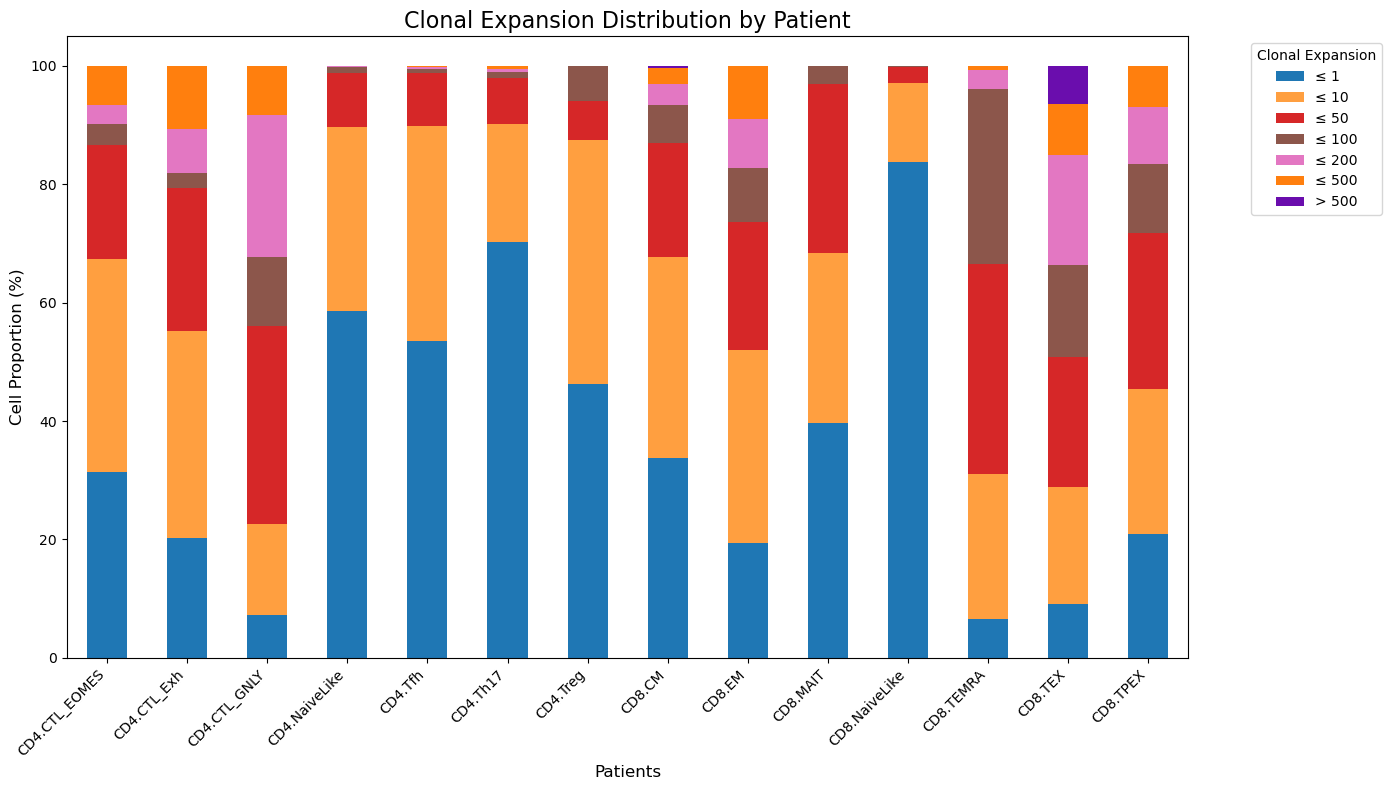

In [72]:
# Access the 'airr' module data
airr_obs = mdata.mod['airr'].obs

# Count the number of cells in each clonal expansion category per patient
clonal_distribution = pd.crosstab(airr_obs['ATLAS_TIL_KNN'], airr_obs['clonal_expansion'], normalize='index') * 100

# Sort the columns in the correct order of categories
category_order = ['≤ 1', '≤ 10', '≤ 50', '≤ 100', '≤ 200', '≤ 500', '> 500']
clonal_distribution = clonal_distribution[category_order]

# Define custom colors with "> 500" in dark purple
custom_colors = {
    "≤ 1": "#1f77b4",   # Blue
    "≤ 10": "#ff9f40",  # Light orange
    "≤ 50": "#d62728",  # Dark red
    "≤ 100": "#8c564b", # Brown
    "≤ 200": "#e377c2", # Pink
    "≤ 500": "#ff7f0e", # Strong orange
    "> 500": "#6a0dad"  # Dark purple
}
colors = [custom_colors[cat] for cat in category_order]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(14, 8))
clonal_distribution.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Customize the plot
plt.title('Clonal Expansion Distribution by Patient', fontsize=16)
plt.xlabel('Patients', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Clonal Expansion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

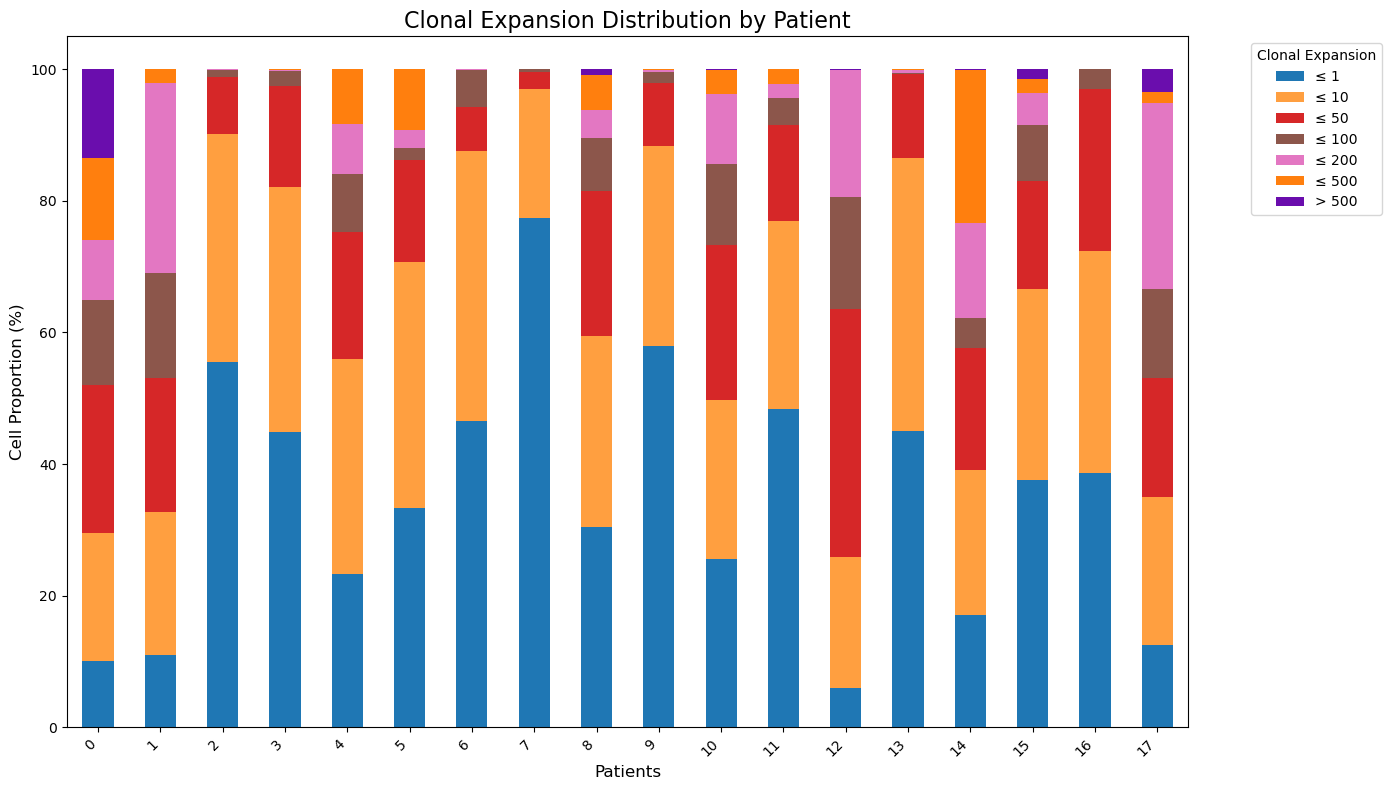

In [75]:
# Access the 'airr' module data
airr_obs = mdata.mod['airr'].obs

# Count the number of cells in each clonal expansion category per patient
clonal_distribution = pd.crosstab(airr_obs['leiden'], airr_obs['clonal_expansion'], normalize='index') * 100

# Sort the columns in the correct order of categories
category_order = ['≤ 1', '≤ 10', '≤ 50', '≤ 100', '≤ 200', '≤ 500', '> 500']
clonal_distribution = clonal_distribution[category_order]

# Define custom colors with "> 500" in dark purple
custom_colors = {
    "≤ 1": "#1f77b4",   # Blue
    "≤ 10": "#ff9f40",  # Light orange
    "≤ 50": "#d62728",  # Dark red
    "≤ 100": "#8c564b", # Brown
    "≤ 200": "#e377c2", # Pink
    "≤ 500": "#ff7f0e", # Strong orange
    "> 500": "#6a0dad"  # Dark purple
}
colors = [custom_colors[cat] for cat in category_order]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(14, 8))
clonal_distribution.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Customize the plot
plt.title('Clonal Expansion Distribution by cluster', fontsize=16)
plt.xlabel('Patients', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Clonal Expansion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Número de filas después de excluir clusters: 22843


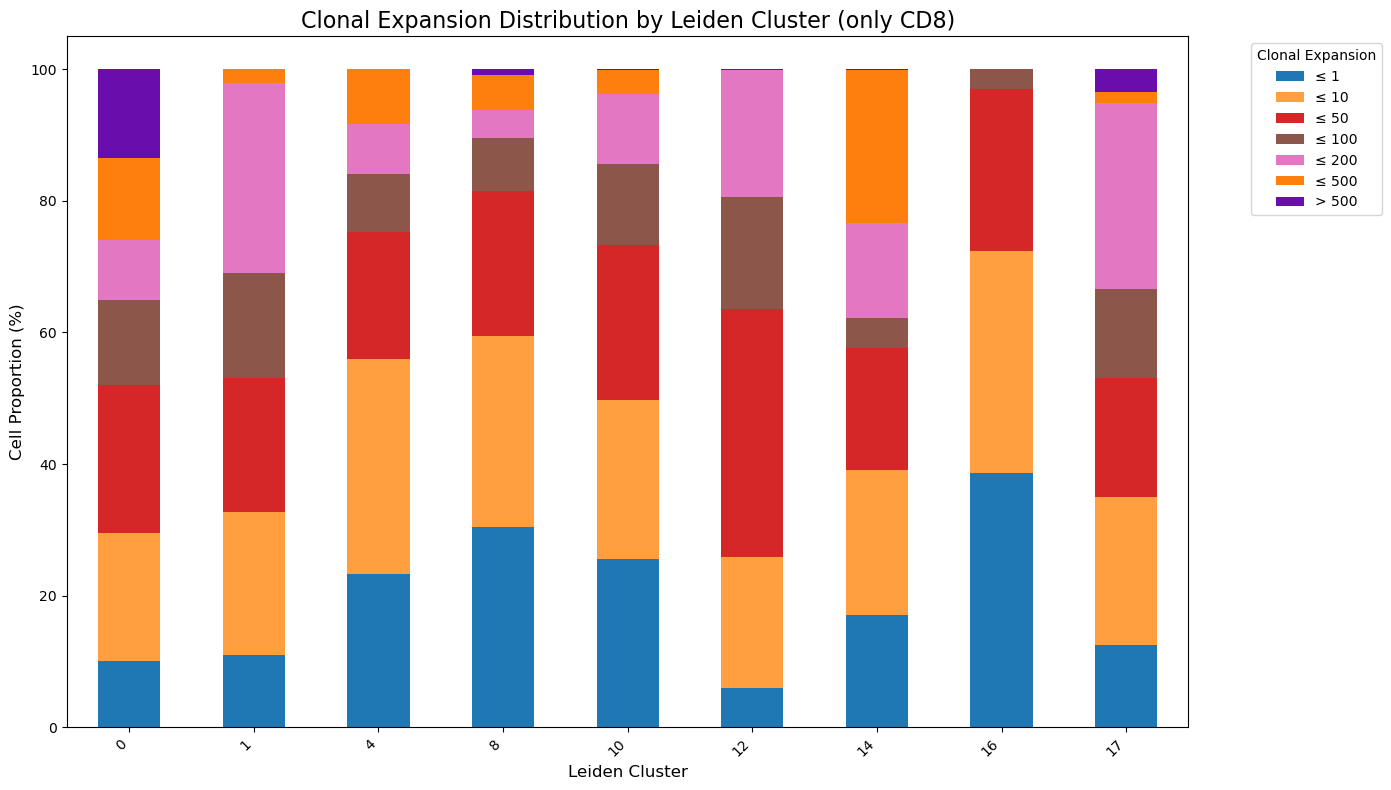

In [84]:
# Access the 'airr' module data
airr_obs = mdata.mod['airr'].obs

# Excluir los clusters especificados como cadenas
exclude_clusters = ['6', '13', '5', '7', '3', '2', '9', '11', '15']  # Asegúrate de que son cadenas
airr_obs_filtered = airr_obs[~airr_obs['leiden'].isin(exclude_clusters)]

# Verifica cuántos datos se excluyeron
print(f"Número de filas después de excluir clusters: {airr_obs_filtered.shape[0]}")

# Count the number of cells in each clonal expansion category per Leiden cluster
clonal_distribution = pd.crosstab(airr_obs_filtered['leiden'], airr_obs_filtered['clonal_expansion'], normalize='index') * 100

# Sort the columns in the correct order of categories
category_order = ['≤ 1', '≤ 10', '≤ 50', '≤ 100', '≤ 200', '≤ 500', '> 500']
clonal_distribution = clonal_distribution[category_order]

# Define custom colors with "> 500" in dark purple
custom_colors = {
    "≤ 1": "#1f77b4",   # Blue
    "≤ 10": "#ff9f40",  # Light orange
    "≤ 50": "#d62728",  # Dark red
    "≤ 100": "#8c564b", # Brown
    "≤ 200": "#e377c2", # Pink
    "≤ 500": "#ff7f0e", # Strong orange
    "> 500": "#6a0dad"  # Dark purple
}
colors = [custom_colors[cat] for cat in category_order]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(14, 8))
clonal_distribution.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Customize the plot
plt.title('Clonal Expansion Distribution by Leiden Cluster (only CD8)', fontsize=16)
plt.xlabel('Leiden Cluster', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Clonal Expansion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

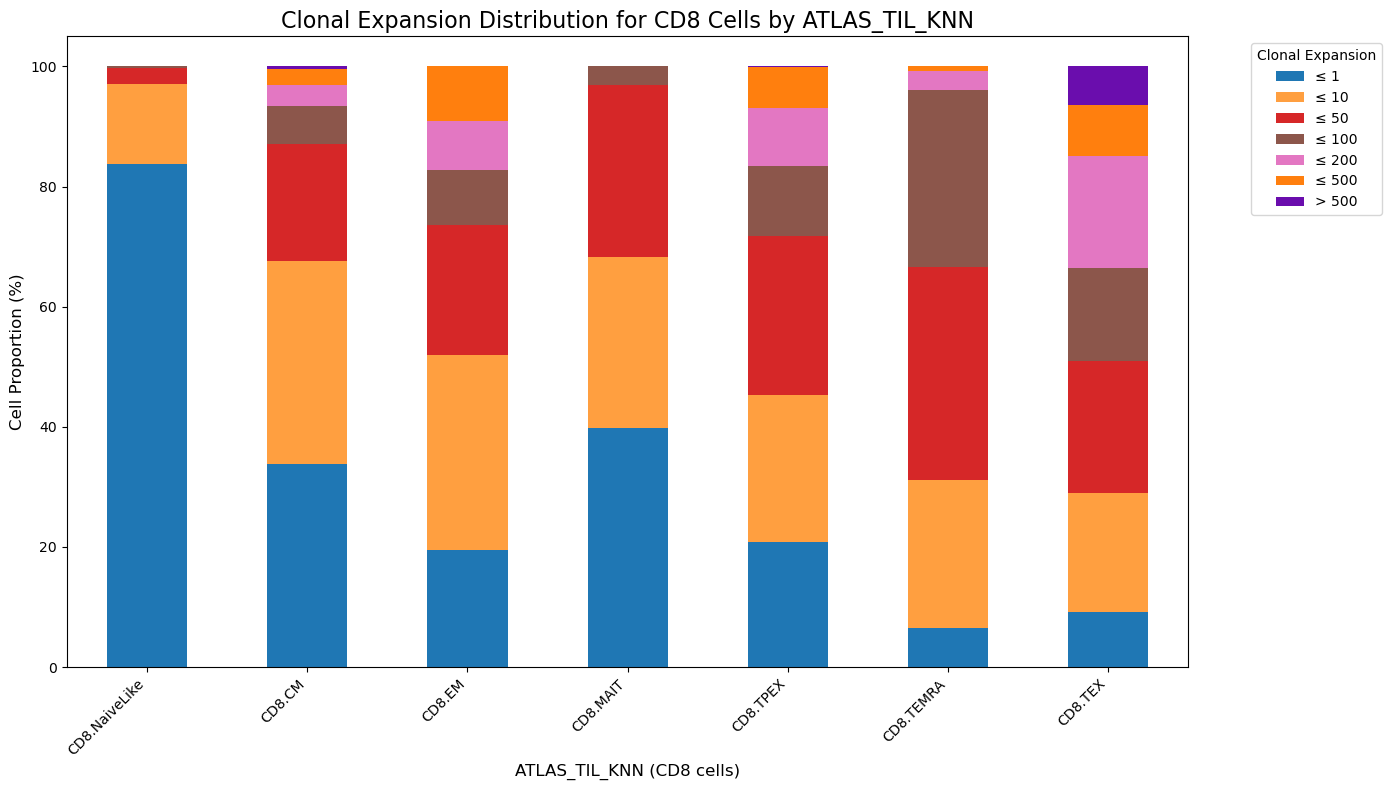

In [74]:
# Access the 'airr' module data
airr_obs = mdata.mod['airr'].obs

# Filter for cells that contain 'CD8' in the 'ATLAS_TIL_KNN' column
cd8_obs = airr_obs[airr_obs['ATLAS_TIL_KNN'].str.contains('CD8', na=False)]

# Count the number of cells in each clonal expansion category per patient for CD8 cells
clonal_distribution = pd.crosstab(cd8_obs['ATLAS_TIL_KNN'], cd8_obs['clonal_expansion'], normalize='index') * 100

# Define custom order for 'ATLAS_TIL_KNN' categories (the specific CD8 types)
category_order = [
    'CD8.NaiveLike', 
    'CD8.CM', 
    'CD8.EM', 
    'CD8.MAIT', 
    'CD8.TPEX', 
    'CD8.TEMRA', 
    'CD8.TEX'
]

# Reindex the distribution table to match the desired category order
clonal_distribution = clonal_distribution.reindex(category_order)

# Sort the columns in the correct order of categories
clonal_category_order = ['≤ 1', '≤ 10', '≤ 50', '≤ 100', '≤ 200', '≤ 500', '> 500']
clonal_distribution = clonal_distribution[clonal_category_order]

# Define custom colors with "> 500" in dark purple
custom_colors = {
    "≤ 1": "#1f77b4",   # Blue
    "≤ 10": "#ff9f40",  # Light orange
    "≤ 50": "#d62728",  # Dark red
    "≤ 100": "#8c564b", # Brown
    "≤ 200": "#e377c2", # Pink
    "≤ 500": "#ff7f0e", # Strong orange
    "> 500": "#6a0dad"  # Dark purple
}
colors = [custom_colors[cat] for cat in clonal_category_order]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(14, 8))
clonal_distribution.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Customize the plot
plt.title('Clonal Expansion Distribution for CD8 Cells by ATLAS_TIL_KNN', fontsize=16)
plt.xlabel('ATLAS_TIL_KNN (CD8 cells)', fontsize=12)
plt.ylabel('Cell Proportion (%)', fontsize=12)
plt.legend(title='Clonal Expansion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### FIRMAS TRANSCRIPTOMICAS TCR CIMA PLUS POR PACIENTE 

In [3]:
mdata

MuData object with n_obs × n_vars = 49043 × 23209
  2 modalities
    gex:	49043 x 23209
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'prediction', 'doublet', 'doublet_filtered', 'Sample', 'n_genes', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'ATLAS_TIL_KNN', 'ATLAS_TIL_score', 'Celltypist', 'Celltypist_score', 'leiden', 'leiden_names'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors'
      obsm:	'X_pca_harmony', 'X_umap'
      layers:	'counts_soupx_crude', 'original_counts'
      obsp:	'connectivities', 'distances'
    airr:	49043 x 0
      obs:	'sample', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'clonal_expansion', 'clone_id_freq', 'FirmaCimaPlus_FINAL ', 'FirmaCima_FINAL ', 'Firma_Oliveira_FINAL ', 'Lowery_Patente-2_FINAL(CD8) ', 'Lowery_Patente_FINAL(CD8) ', 'Petremand_FINAL ', 'Lowery_ALL_FINAL', 'ATLAS_TIL', 'ATLAS_TIL_score', 'Celltypist', 'Celltypist_score', 'pgen_cdr3_b_aa_nlog10_z', 'pgen_cdr3_a_aa_nlog10_z'
      uns:	'chain_indices', 'clone_id', 'ir_dist_nt_identity'
      obsm:	'airr', 'chain_indices'

Pacientes disponibles en los datos: ['PT-14' 'PT-17' 'PT-20' 'PT-22' 'PT-28' 'PT-18' 'PT-14-pan' 'PT-41'
 'PT-49' 'PT-50']


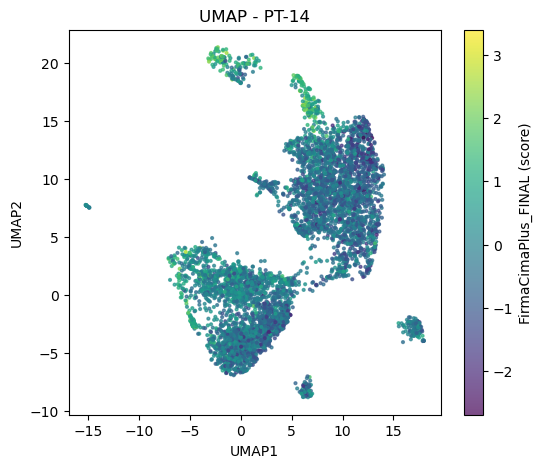

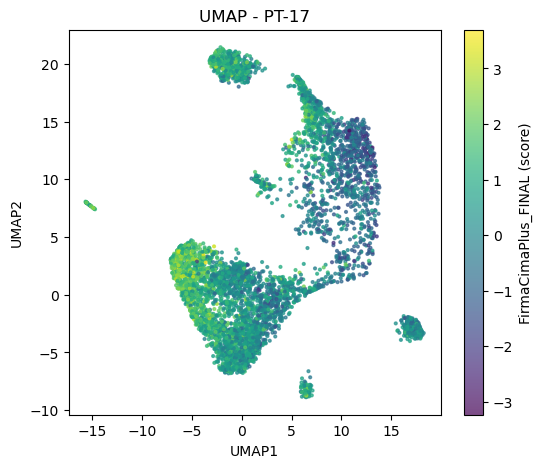

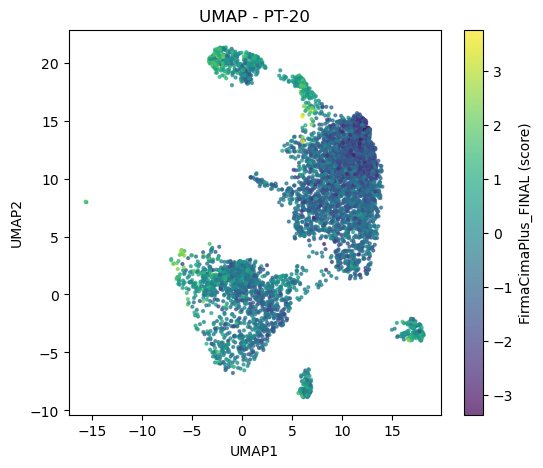

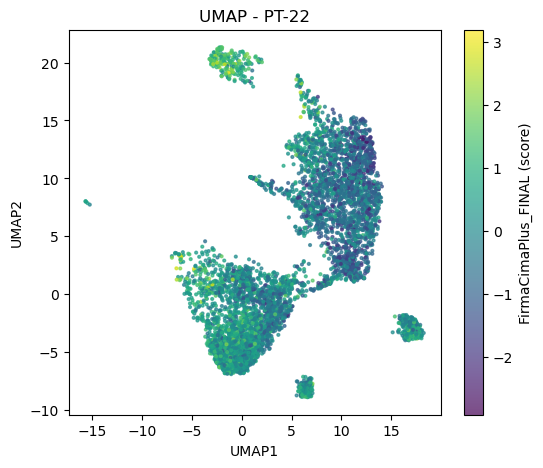

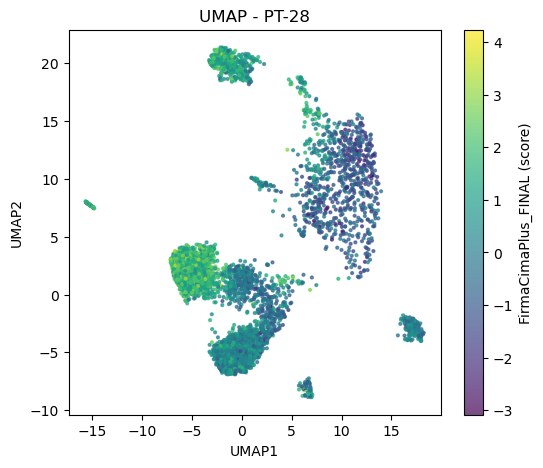

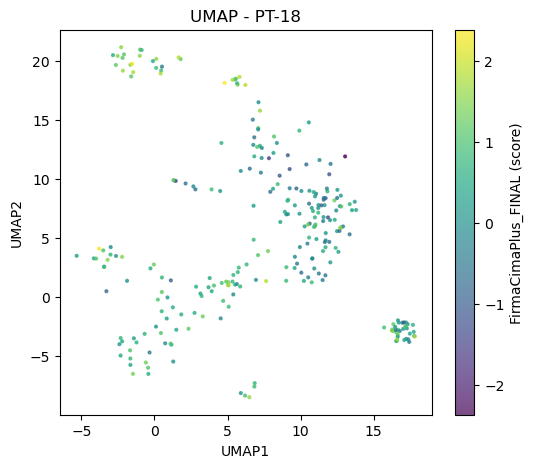

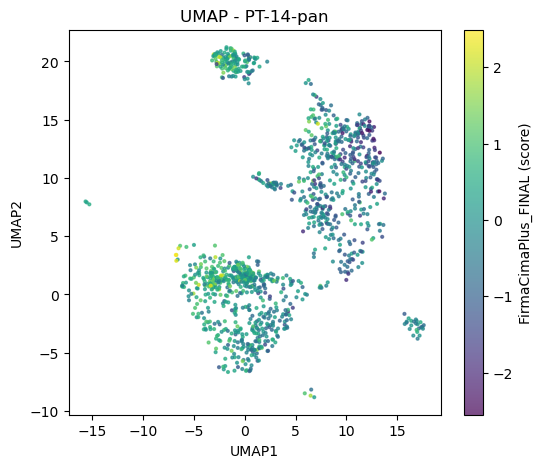

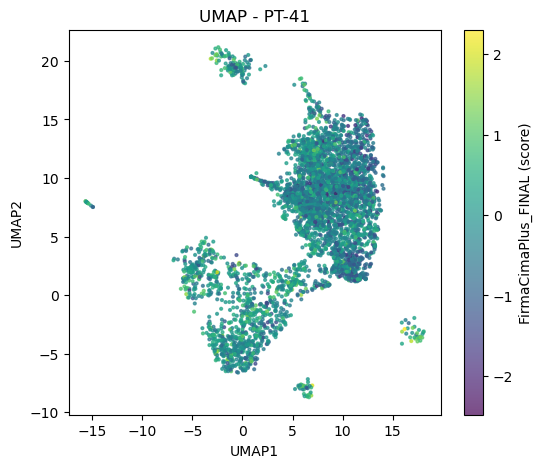

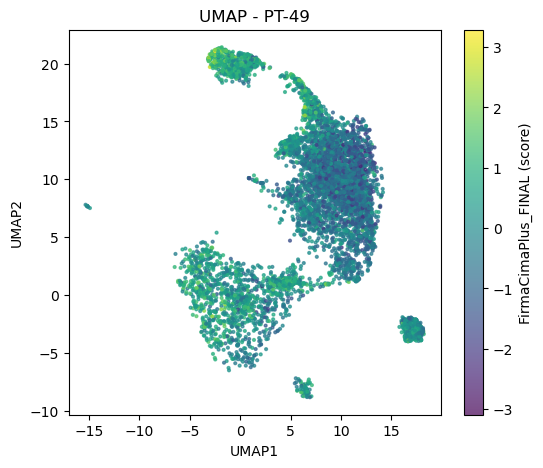

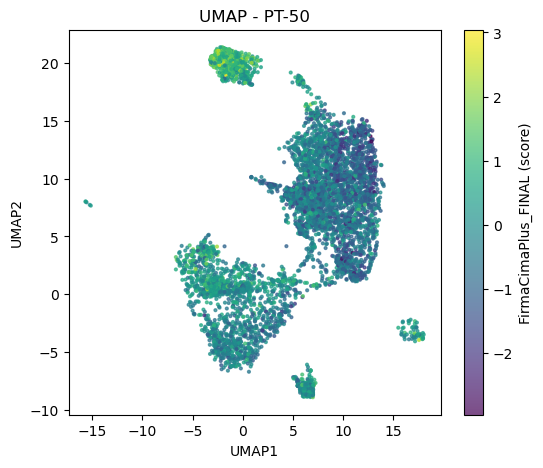

In [7]:
# Extraer AnnData de las modalidades 'gex' y 'airr'
adata_gex = mdata.mod['gex']
adata_airr = mdata.mod['airr']

# Extraer coordenadas UMAP desde 'gex'
umap = pd.DataFrame(adata_gex.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata_gex.obs.index)

# Extraer 'sample' y la firma 'FirmaCimaPlus_FINAL ' desde 'airr.obs'
umap['Sample'] = adata_airr.obs['sample'].astype(str).str.replace("_", "-")  # Asegurar formato
umap['FirmaCimaPlus_FINAL'] = adata_airr.obs['FirmaCimaPlus_FINAL '].astype(float)  # Convertir a numérico

# Verificar pacientes disponibles
print("Pacientes disponibles en los datos:", umap['Sample'].unique())

# Generar UMAPs individuales por paciente
patients = umap['Sample'].unique()
for patient in patients:
    sub_umap = umap[umap['Sample'] == patient]

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(
        sub_umap['UMAP1'], sub_umap['UMAP2'], 
        c=sub_umap['FirmaCimaPlus_FINAL'], cmap='viridis', alpha=0.7, s=4
    )
    plt.colorbar(scatter, label="FirmaCimaPlus_FINAL (score)")
    plt.title(f"UMAP - {patient}")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.show()

### FIRMAS TRANSCRIPTOMICAS lowery (107)

In [20]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import gzip
from matplotlib.pyplot import rc_context
import anndata as ad  # Importa anndata
import numpy as np
import muon as mu
import mudata as md
from mudata import MuData
sc.set_figure_params(dpi=100)
import decoupler as dc
# Actualiza las importaciones para futuras versiones
from anndata.io import read_csv, read_excel, read_hdf, read_loom, read_mtx, read_text, read_umi_tools

In [21]:
mdata_file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/mudata_harmony_conTCR_KNN_leiden.h5mu"
mdata = mu.read(mdata_file)

/home/evercher/miniforge3/envs/analisis_firmas_AUC/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/evercher/miniforge3/envs/analisis_firmas_AUC/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [22]:
adata_gex = mdata.mod['gex']

In [23]:
# Cargar el archivo Excel
file_path = '/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Scripts/Excels_firmas_transcriptomicas/science.abl5447_table_s4.xlsx'
excel_data = pd.ExcelFile(file_path)

# Leer la primera hoja del archivo
first_sheet = excel_data.parse(excel_data.sheet_names[0])

# Crear el diccionario donde cada clave es una firma genética y cada valor es una lista de genes
firmas_transcriptomicas = {col: first_sheet[col].dropna().tolist() for col in first_sheet.columns}

# Imprimir las primeras claves y valores para verificar
print({key: firmas_transcriptomicas[key][:5] for key in list(firmas_transcriptomicas.keys())[:5]})

{'Krishna.ACT.Stem.Like': ['KLF2', 'RASA3', 'FGFBP2', 'CDC25B', 'TCF7'], 'Krishna.ACT.Term.Diff': ['ENTPD1', 'CD69', 'RRM2', 'TYMS', 'CD8B'], 'Li.CD8.DYS': ['LAG3', 'HAVCR2', 'MYO7A', 'GBP2', 'GALNT1'], 'TOX_Scott': ['IGKC', 'AVIL', 'TOX', 'KLRB1C', 'MEGF11'], 'Wu.8EFF': ['GNLY', 'NKG7', 'GZMH', 'CST7', 'KLRD1']}


In [24]:
# Convertir firmas transcriptómicas en un formato similar a reactome
firma_df = pd.DataFrame(
    [(firma, gene) for firma, genes in firmas_transcriptomicas.items() for gene in genes],
    columns=["geneset", "genesymbol"]
)

In [25]:
firma_df

geneset genesymbol
0        Krishna.ACT.Stem.Like       KLF2
1        Krishna.ACT.Stem.Like      RASA3
2        Krishna.ACT.Stem.Like     FGFBP2
3        Krishna.ACT.Stem.Like     CDC25B
4        Krishna.ACT.Stem.Like       TCF7
...                        ...        ...
5633  Caushi.CD8.Proliferating     LGALS1
5634  Caushi.CD8.Proliferating   HIST1H1B
5635  Caushi.CD8.Proliferating      BRCA2
5636  Caushi.CD8.Proliferating      TROAP
5637  Caushi.CD8.Proliferating   HIST1H1D

[5638 rows x 2 columns]

In [26]:
aucell_scores = dc.run_aucell(
    adata_gex,  # Pasa directamente el objeto AnnData
    firma_df,  # El DataFrame convertido
    source="geneset",  # Columna con los nombres de las firmas
    target="genesymbol",  # Columna con los genes
    use_raw=False,  # Usar la capa activa en AnnData
    n_up=None,  # Usa por defecto el top 5% de genes
    min_n=5,  # Mínimo de genes requeridos en el conjunto
    seed=42,  # Para reproducibilidad
    verbose=True
)

75 features of mat are empty, they will be removed.
Running aucell on mat with 49043 samples and 23134 targets for 107 sources.


  0%|          | 0/49043 [00:00<?, ?it/s]

In [28]:
adata_gex.obsm['aucell_estimate'].head()

source                   B16_PROG.EX_Miller  B16_TERMINAL.EX_Miller    CD3.MT  \
AAACCTGAGAAGAAGC-1_PT14            0.000000                0.024726  0.412132   
AAACCTGAGGACAGAA-1_PT14            0.064298                0.000000  0.209185   
AAACCTGAGTGGAGTC-1_PT14            0.024175                0.020600  0.296360   
AAACCTGAGTGTCTCA-1_PT14            0.039243                0.009159  0.192201   
AAACCTGCAAACTGTC-1_PT14            0.000000                0.000000  0.200347   

source                   CD8_B_Feldman  CD8_G_Feldman  Caushi.CD4-Tfh(1)  \
AAACCTGAGAAGAAGC-1_PT14       0.063586       0.171224           0.044678   
AAACCTGAGGACAGAA-1_PT14       0.045161       0.146372           0.161988   
AAACCTGAGTGGAGTC-1_PT14       0.133392       0.030168           0.102812   
AAACCTGAGTGTCTCA-1_PT14       0.039374       0.070501           0.097110   
AAACCTGCAAACTGTC-1_PT14       0.048460       0.161744           0.090043   

source                   Caushi.CD4-Tfh(2)  Caushi.CD4-Th(1)  \
AAACCTGAGAAGAAGC-1_PT14           0.095848          0.229894   
AAACCTGAGGACAGAA-1_PT14           0.174411          0.118390   
AAACCTGAGTGGAGTC-1_PT14           0.200214          0.003520   
AAACCTGAGTGTCTCA-1_PT14           0.062611          0.094611   
AAACCTGCAAACTGTC-1_PT14           0.127848          0.142521   

source                   Caushi.CD4-Th(2)  Caushi.CD4-Th(3)  ...  Wu.CD4.TCF7  \
AAACCTGAGAAGAAGC-1_PT14          0.214455          0.284232  ...     0.849193   
AAACCTGAGGACAGAA-1_PT14          0.087283          0.124281  ...     0.943480   
AAACCTGAGTGGAGTC-1_PT14          0.081238          0.204269  ...     0.881771   
AAACCTGAGTGTCTCA-1_PT14          0.076508          0.101593  ...     0.968993   
AAACCTGCAAACTGTC-1_PT14          0.173076          0.191183  ...     0.908112   

source                   Wu.CD4.Trm  Wu.Treg.1  Wu.Treg.2  Yost_CD8 Act/Exh  \
AAACCTGAGAAGAAGC-1_PT14    0.740471   0.215390   0.385390          0.158129   
AAACCTGAGGACAGAA-1_PT14    0.494854   0.335704   0.270388          0.195644   
AAACCTGAGTGGAGTC-1_PT14    0.498081   0.497912   0.676014          0.197316   
AAACCTGAGTGTCTCA-1_PT14    0.579328   0.212683   0.299433          0.074415   
AAACCTGCAAACTGTC-1_PT14    0.543000   0.194466   0.280201          0.152680   

source                   Yost_CD8 Activated  Yost_CD8 Eff mem  Yost_CD8 Exh  \
AAACCTGAGAAGAAGC-1_PT14            0.200172          0.156630      0.153563   
AAACCTGAGGACAGAA-1_PT14            0.215481          0.082362      0.163072   
AAACCTGAGTGGAGTC-1_PT14            0.149408          0.075252      0.229235   
AAACCTGAGTGTCTCA-1_PT14            0.131234          0.048378      0.039572   
AAACCTGCAAACTGTC-1_PT14            0.210827          0.097101      0.099194   

source                   Yost_CD8_Memory  Yost_Naive  
AAACCTGAGAAGAAGC-1_PT14         0.132574    0.277734  
AAACCTGAGGACAGAA-1_PT14         0.108395    0.264660  
AAACCTGAGTGGAGTC-1_PT14         0.141685    0.188930  
AAACCTGAGTGTCTCA-1_PT14         0.116718    0.223323  
AAACCTGCAAACTGTC-1_PT14         0.099723    0.389607  

[5 rows x 107 columns]

In [ ]:
# Seleccionar las firmas a representar
#selected_firmas = [
    "Oh.CD4.Activate", "Yost_CD8 Activated", "Li.CD8.DYS",
    "Yost_CD8_Memory", "Caushi.Stem-like memory", "Krishna.ACT.Term.Diff",
    "Wu.8EFF", "Wu.8EM", "Wu.8Trm.1", "Oh.CD8.Naive", "Caushi.CD4-Treg"
]

# Transferir los scores relevantes desde obsm a obs
adata_gex.obs[selected_firmas] = adata_gex.obsm['aucell_estimate'][selected_firmas]

# Representar los scores en el UMAP (asegurándonos de usar scVI_log1p como base)
#sc.pl.umap(
    adata_gex,
    color=selected_firmas,  # Añadir las firmas seleccionadas
    frameon=False,
    ncols=3,  # Distribuir los gráficos en 3 columnas
    wspace=0.4  # Ajustar el espaciado entre los subplots
)

In [ ]:
# Agrupar por clúster y calcular el promedio de los scores
cluster_means = adata_gex.obs.groupby("leiden")[selected_firmas].mean()

# Mostrar el DataFrame con los perfiles promedio
print(cluster_means.head())

In [30]:
from scipy.stats import zscore

# Aplicar z-score a los promedios por clúster (por columna, es decir, firma por firma)
cluster_means_zscore = cluster_means.apply(zscore, axis=0)

# Mostrar el resultado con z-score aplicado
print(cluster_means_zscore.head())

        Oh.CD4.Activate  Yost_CD8 Activated  Li.CD8.DYS  Yost_CD8_Memory  \
leiden                                                                     
0             -0.488566            0.512804    0.724138         0.858939   
1             -1.655749            0.028011    2.975011         1.910759   
2              1.348357            0.811107   -0.928059        -0.877431   
3              0.540084            0.376485   -0.965419        -0.874942   
4             -0.634027           -1.090769   -0.126534         2.224616   

        Caushi.Stem-like memory  Krishna.ACT.Term.Diff   Wu.8EFF    Wu.8EM  \
leiden                                                                       
0                     -0.882835              -0.106781  1.430209  1.095410   
1                     -1.214061               0.062436  1.623544  1.931657   
2                      1.204345              -0.277903 -0.819928 -0.906727   
3                      0.459025              -0.426117 -0.661976 -0.825963   

In [31]:
firmas = [
    "Krishna.ACT.Stem.Like", "Krishna.ACT.Term.Diff", "Li.CD8.DYS", "TOX_Scott", "Wu.8EFF",
    "Wu.8EM", "Wu.8Trm.1", "Wu.8Trm.2", "Wu.8Trm.3", "Wu.8chrom", "Wu.8Mit", "Wu.8KLRB1",
    "Oh.CD8.CD39", "Oh.CD8.Naive", "Oh.CD8.HSP", "Oh.CD8.MAIT", "Oh.CD8.FGFBP2",
    "Oh.CD8.RPL", "Oh.CD8.MITO", "Oh.CD8.XCL", "Oh.CD8.CM", "Oh.CD8.PRO", "Mel_Exhaust_Tirosh",
    "CD8_G_Feldman", "CD8_B_Feldman", "Exhaust_1_Feldman", "Exhaust_2_Feldman",
    "Exhaust_3_Feldman", "Mem_Eff_4_Feldman", "Early.Act_5_Feldman", "Mem_Eff_6_Feldman",
    "LCMV_PROG.EX_Miller", "LCMV_TERMN.EX_Miller", "B16_PROG.EX_Miller", "B16_TERMINAL.EX_Miller",
    "Wu.CD4.Trm", "Wu.CD4.RPL32", "Wu.CD4.TCF7", "Wu.CD4.FOS", "Wu.CD4.IL6ST", "Wu.Treg.1",
    "Wu.Treg.2", "CD3.MT", "Oh.CD4.CM", "Oh.CD4IL2RAHI", "Oh.CD4IL2RALO", "Oh.CD4.Activate",
    "Oh.CD4.GZMB", "Oh.CD4.GZMK", "Oh.CD4.TH17", "Oh.CD4.CXCL13", "Oh.CD4.MITO",
    "Oh.CD4.HSP", "Oh.CD4.PROLIF", "Oh.TIL_CD4IL2RAHI", "Oh.TIL_CD4IL2RALO",
    "Oh.TIL_CD4.GZMB", "Oh.TIL_CD4.GZMK", "Oliveira.TEM", "Oliveira.TAct", "Oliveira.TPE",
    "Oliveira.TProl", "Oliveira.TTE", "Oliveira.Tumor-spec TTE", "Oliveira.Tumor spec-TAct",
    "Oliveira.Tumor spec-TPE", "Oliveira.Tumor-spec TProl", "Oliveira.Tumor-spec TEM",
    "Yost_Naive", "Yost_CD8_Memory", "Yost_CD8 Eff mem", "Yost_CD8 Activated",
    "Yost_CD8 Act/Exh", "Yost_CD8 Exh", "Jansen_Stem like", "Jansen_Term diff",
    "Caushi.CD8-TRM(1)", "Caushi.CD8-Effector(1)", "Caushi.CD4-Th(1)", "Caushi.CD8-Effector(2)",
    "Caushi.CD4-Th(2)", "Caushi.CD4-Treg", "Caushi.MAIT", "Caushi.CD4-Tfh(1)",
    "Caushi.Stem-like memory", "Caushi.CD8-TRM(2)", "Caushi.CD4-Tfh(2)", "Caushi.CD8-Effector(3)",
    "Caushi.CD4-Th(3)", "Caushi.CD8-MHCII", "Caushi.CD8-Proliferating", "Caushi.CD4CD8(I)",
    "Caushi.CD4CD8(II)", "Caushi.CD8.Effector(I)", "Caushi.CD8.Effector(II)",
    "Caushi.CD8.Effector(III)", "Caushi.CD8.TRM(I)", "Caushi.CD8.TRM(II)", "Caushi.CD8.TRM(III)",
    "Caushi.CD8.TRM(IV)", "Caushi.CD8.TRM(V)", "Caushi.CD8.TRM(VI)", "Caushi.CD8.CD4CD8(I)",
    "Caushi.CD8.CD4CD8(II)", "Caushi.CD8.Stem-like memory", "Caushi.CD8.MAIT",
    "Caushi.CD8.Proliferating"
]

In [ ]:
import matplotlib.pyplot as plt

# Validar que todas las firmas seleccionadas tienen datos en 'aucell_estimate'
firmas_disponibles = [
    firma for firma in firmas if firma in adata_gex.obsm["aucell_estimate"].columns
]

# Transferir los scores de las firmas disponibles desde obsm a obs
for firma in firmas_disponibles:
    adata_gex.obs[firma] = adata_gex.obsm["aucell_estimate"][firma]

# Generar el UMAP con las firmas seleccionadas distribuidas en 5 columnas
sc.pl.umap(
    adata_gex,
    color=firmas_disponibles,  # Añadir las firmas disponibles
    frameon=False,
    ncols=5,  # Ajustar a 5 columnas
    wspace=0.4,  # Ajustar el espaciado entre subplots
    size=20,  # Ajustar tamaño de los puntos
    title=firmas_disponibles,  # Títulos con los nombres de las firmas
    show=False  # No mostrar automáticamente para poder guardar
)

# Guardar el gráfico como imagen
output_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/08_firmas_transcriptomicas/UMAP_107_firmas_10_pts.jpg"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"UMAP guardado en: {output_path}")


In [33]:
# Guardar el objeto adata en el archivo especificado
output_path = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/08_firmas_transcriptomicas/adata_firm_transcr_10_pts.h5ad"
adata_gex.write(output_path)

#### Analisis DEG

In [ ]:
# ACTIVAR CONDA DANDELION
import dandelion as ddl
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu
import mudata as md
from mudata import MuData
import numpy as np
import warnings
import os

import scirpy as ir
from cycler import cycler

from matplotlib import cm as mpl_cm
from matplotlib import pyplot as plt

from palmotif import compute_motif, svg_logo
import seaborn as sb
warnings.simplefilter(action="ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore")
ddl.logging.print_header()

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

# Opcional: Desactivar warnings específicos (ejemplo: FutureWarnings de anndata)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.errors.DtypeWarning)

# Si usas tqdm y deseas evitar sus warnings
from tqdm import TqdmWarning
warnings.simplefilter(action="ignore", category=TqdmWarning)

In [3]:
# Cargar el archivo MuData
mdata_file = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/05_datos_integrados/mudata_harmony_conTCR_KNN_leiden.h5mu"
mdata = mu.read(mdata_file)

In [4]:
adata_gex = mdata.mod['gex']

In [3]:
# Marcadores de células NK y NKT
nk_markers = ["NKG7","KLRF1", "KLRD1", "HOPX", "KLRE1","B3GAT1","KLRG1","CCR7"]
nkt_markers = ["GATA3","NCAM1","IL2RB","PRF1"]

In [ ]:
sc.pl.umap(adata_gex, color = ["NKG7","PRDM16", "TRDV2","GNLY"], frameon = False, vmax = 2,cmap="Blues")

In [ ]:
sc.pl.umap(adata_gex, color = ["CD4","CD8A"], frameon = False, vmax = 1,cmap="Blues")

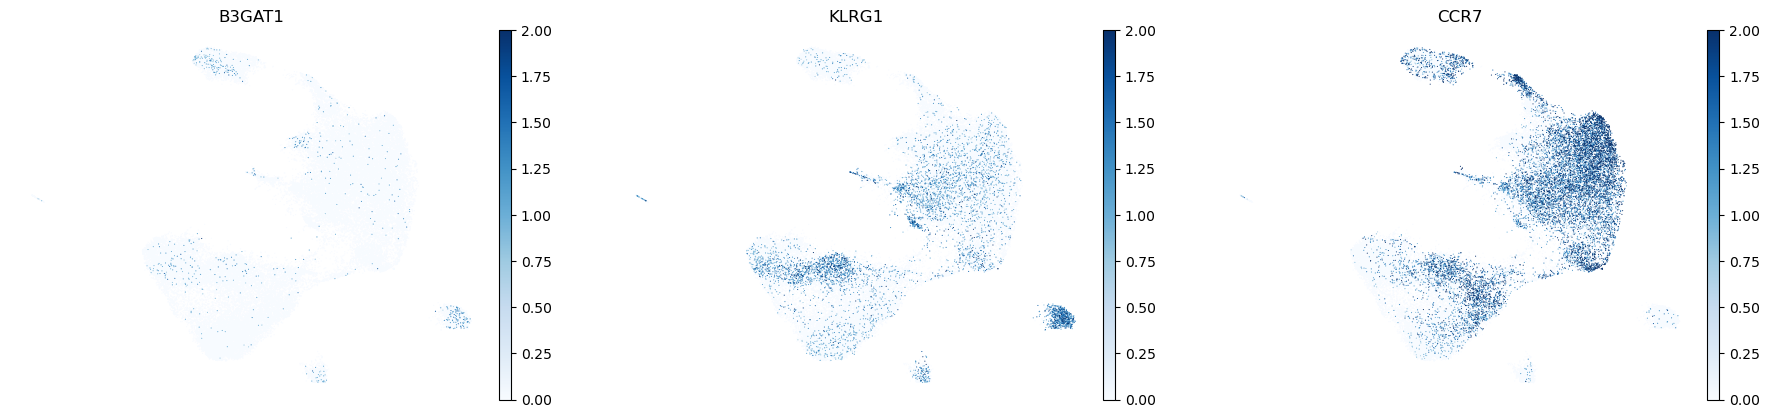

In [7]:
sc.pl.umap(adata_gex, color = ["B3GAT1","KLRG1","CCR7"], frameon = False, vmax = 2,cmap="Blues")

In [8]:
sc.tl.dendrogram(adata_gex, groupby="leiden")

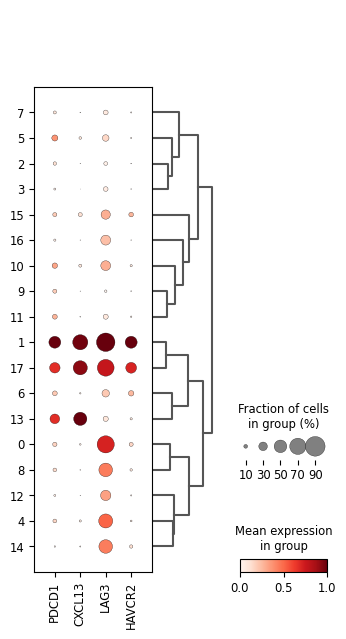

In [10]:
sc.pl.dotplot(adata_gex, var_names = ["PDCD1","CXCL13","LAG3","HAVCR2"],groupby="leiden",dendrogram=True,standard_scale="var")

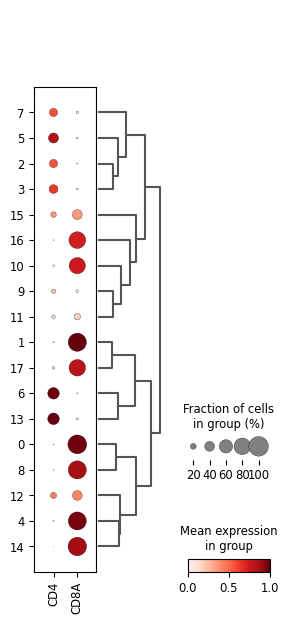

In [11]:
sc.pl.dotplot(adata_gex, var_names = ["CD4","CD8A"],groupby="leiden",dendrogram=True,standard_scale="var")

In [5]:
# Definir los clusters de `leiden` que queremos excluir
clusters_excluir = ["6", "13", "5", "7", "2", "3", "9", "11"]

# Filtrar el `adata_gex` para eliminar estos clusters
adata_filtrado = adata_gex[~adata_gex.obs["leiden"].isin(clusters_excluir)]

In [6]:
sc.tl.dendrogram(adata_filtrado, groupby="leiden")

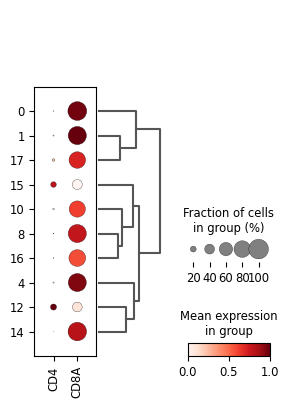

In [86]:
sc.pl.dotplot(adata_filtrado, var_names = ["CD4","CD8A"],groupby="leiden",dendrogram=True,standard_scale="var")

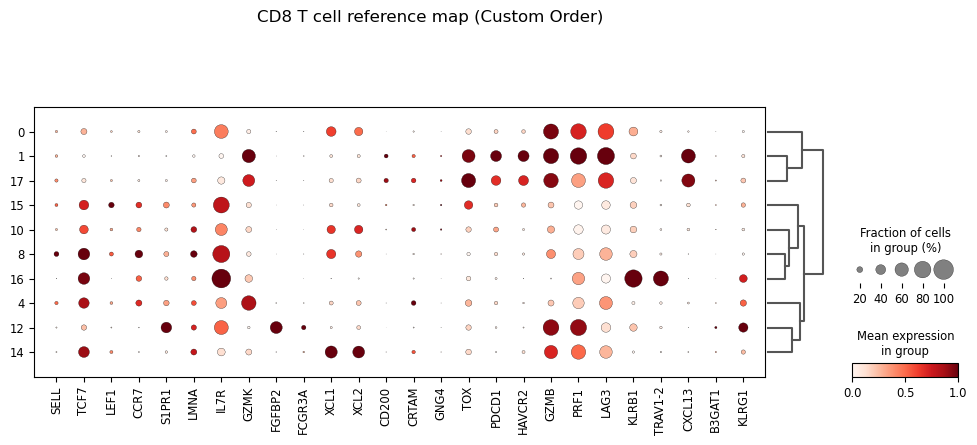

In [15]:
# Generar el DotPlot con el orden personalizado
sc.pl.dotplot(
    adata_filtrado,
    var_names=[
        "SELL", "TCF7", "LEF1", "CCR7", "S1PR1", "LMNA", "IL7R", "GZMK", "FGFBP2",
        "FCGR3A", "XCL1", "XCL2", "CD200", "CRTAM", "GNG4", "TOX", "PDCD1", "HAVCR2",
        "GZMB", "PRF1", "LAG3", "KLRB1", "TRAV1-2","CXCL13","B3GAT1","KLRG1"
    ],
    groupby="leiden",
    dendrogram=True, # si lo quitamos se pone como el custom_order
    standard_scale="var",
    title="CD8 T cell reference map (Custom Order)"
)


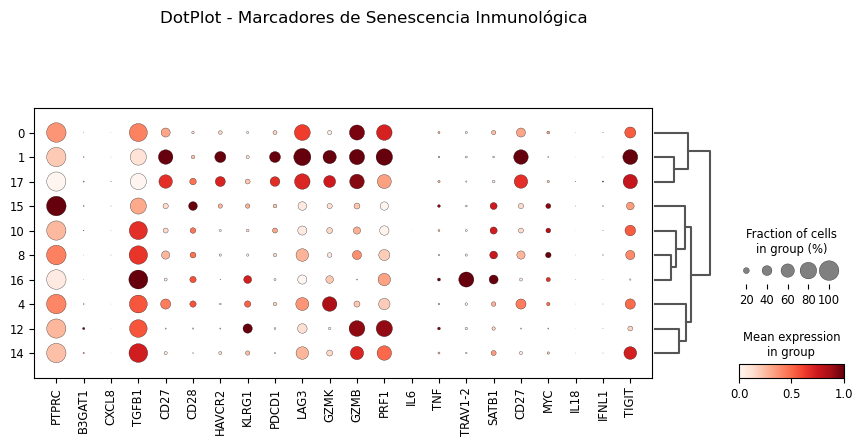

In [8]:
sc.pl.dotplot(
    adata_filtrado,
    var_names=[
        "PTPRC", "B3GAT1", "CXCL8", "TGFB1",  # Genes corregidos
        "CD27","CD28", "HAVCR2", "KLRG1", "PDCD1", "LAG3", 
        "GZMK", "GZMB", "PRF1", "IL6", "TNF",  
        "TRAV1-2", "SATB1", "CD27", "MYC","IL18","IFNL1","TIGIT"
    ],
    groupby="leiden",
    dendrogram=True,
    standard_scale="var",
    title="DotPlot - Marcadores de Senescencia Inmunológica"
)

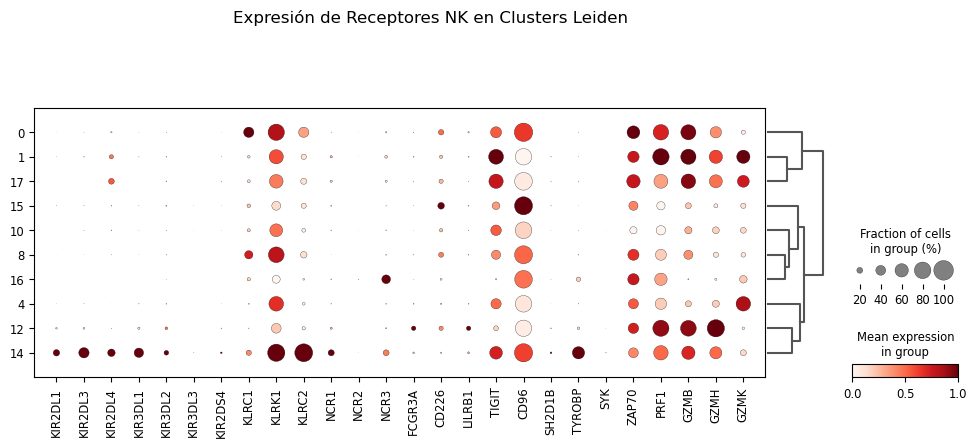

In [10]:
# Generar el DotPlot con los NKRs disponibles en el dataset
sc.pl.dotplot(
    adata_filtrado,
    var_names=[
        'KIR2DL1', 'KIR2DL3', 'KIR2DL4', 'KIR3DL1', 'KIR3DL2', 'KIR3DL3',
        'KIR2DS4', 'KLRC1', 'KLRK1', 'KLRC2', 'NCR1', 'NCR2', 'NCR3',
        'FCGR3A', 'CD226', 'LILRB1', 'TIGIT', 'CD96', 'SH2D1B', 'TYROBP',
        'SYK', 'ZAP70', 'PRF1', 'GZMB', 'GZMH', 'GZMK'
    ],
    groupby="leiden",
    dendrogram=True,  # Agrupa por similitud de expresión
    standard_scale="var",
    title="Expresión de Receptores NK en Clusters Leiden"
)


In [25]:
# TARDA UNOS MINUTOS NO DESESPERAR
sc.tl.rank_genes_groups(
    adata_filtrado, groupby="leiden", method="wilcoxon", key_added="dea_leiden"
)

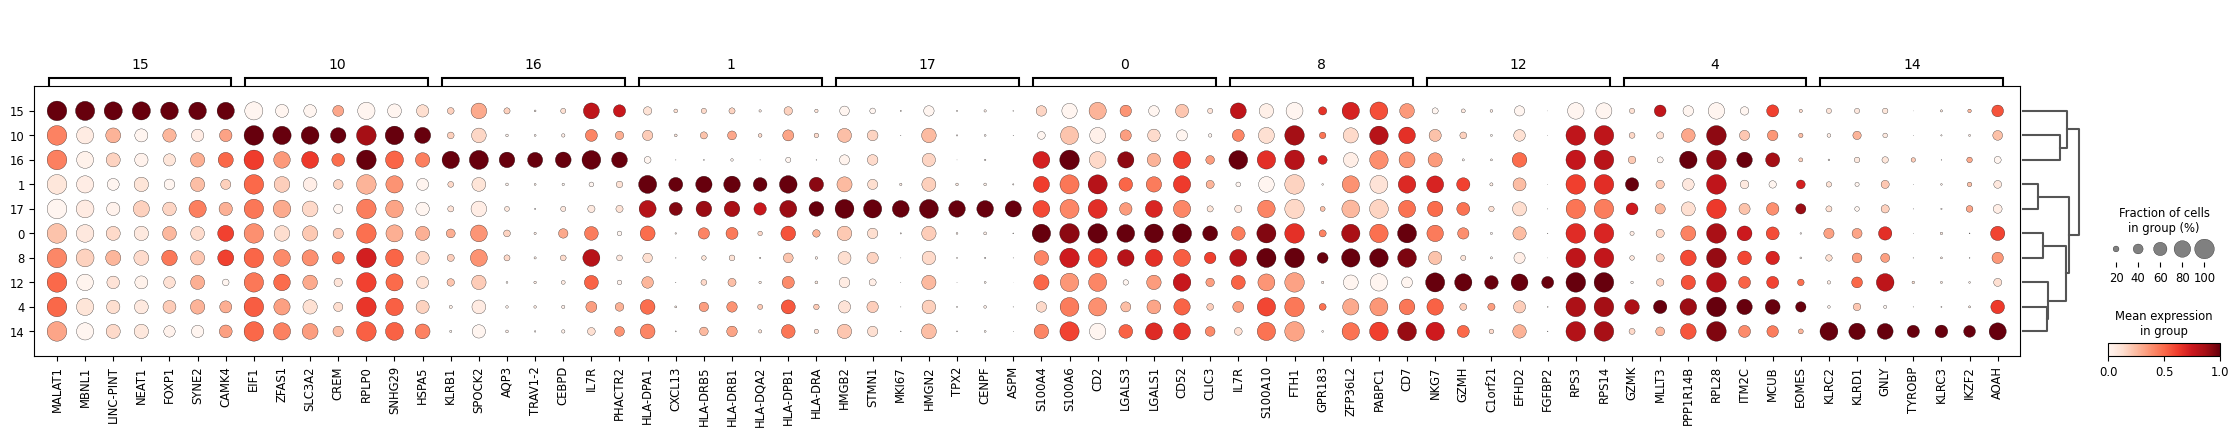

In [34]:
sc.pl.rank_genes_groups_dotplot(
    adata_filtrado, groupby="leiden", standard_scale="var", n_genes=7, key="dea_leiden"
)

In [38]:
print(adata_filtrado.uns["dea_leiden"].keys())  # Debe contener: 'names', 'scores', 'pvals', etc.


dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])


In [41]:
sc.tl.filter_rank_genes_groups(
    adata_filtrado,
    min_in_group_fraction=0.2,
    max_out_group_fraction=0.2,
    key="dea_leiden",  # Aseguramos que use el mismo nombre que ayer
    key_added="dea_leiden_filtered"
)


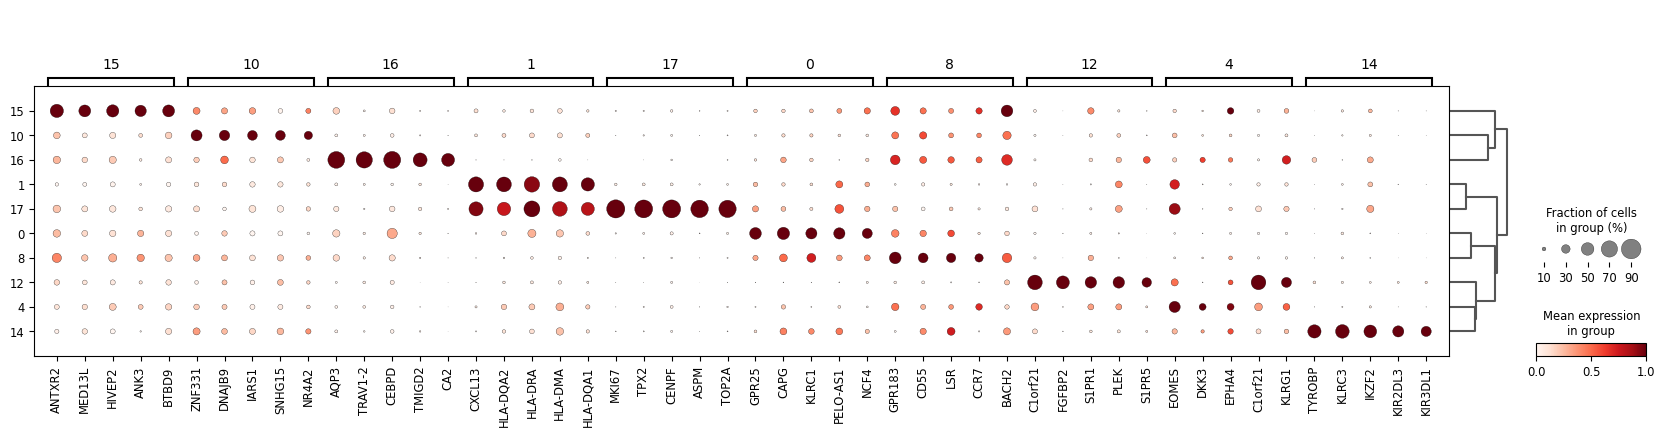

In [43]:
sc.pl.rank_genes_groups_dotplot(
    adata_filtrado,
    groupby="leiden",
    standard_scale="var",
    n_genes=5,
    key="dea_leiden_filtered",
)

In [45]:
# Obtener los resultados de `rank_genes_groups` en un DataFrame
deg_results = sc.get.rank_genes_groups_df(adata_filtrado, key="dea_leiden", group=None)

# Filtrar solo los genes con `pvals_adj < 0.05`
deg_filtered = deg_results[deg_results["pvals_adj"] < 0.05]


In [46]:
deg_filtered

group   names     scores  logfoldchanges         pvals     pvals_adj
0          0  S100A4  64.623932        2.244377  0.000000e+00  0.000000e+00
1          0  S100A6  56.201065        1.025879  0.000000e+00  0.000000e+00
2          0     CD2  54.122921        1.090546  0.000000e+00  0.000000e+00
3          0  LGALS3  53.581234        1.599788  0.000000e+00  0.000000e+00
4          0  LGALS1  53.425053        1.593022  0.000000e+00  0.000000e+00
...      ...     ...        ...             ...           ...           ...
232085    17   RPL13 -11.570943       -0.699147  5.784353e-31  1.525557e-28
232086    17   RPS27 -11.904693       -0.745951  1.118742e-32  3.166450e-30
232087    17   RPL41 -12.313821       -0.611605  7.632209e-35  2.460221e-32
232088    17   RPL30 -12.635270       -0.690604  1.349307e-36  5.133782e-34
232089    17   RPS12 -12.922177       -0.819080  3.374565e-38  1.477741e-35

[24549 rows x 6 columns]

In [48]:
# Ruta donde se guardará el Excel
output_excel = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/06_analisis_diferencia_expresion/DEGs_filtrados_CD8_10_pts.xlsx"

# Guardar en un archivo Excel
deg_filtered.to_excel(output_excel, index=False)

print(f"Archivo Excel guardado en: {output_excel}")

Archivo Excel guardado en: /data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/06_analisis_diferencia_expresion/DEGs_filtrados_CD8_10_pts.xlsx


In [49]:
import itertools
import pandas as pd

# Obtener la lista de clusters de `leiden`
clusters = adata_filtrado.obs["leiden"].unique()

# Crear combinaciones de pares de clusters (ej: 0 vs 1, 0 vs 2, ..., 1 vs 2, etc.)
cluster_pairs = list(itertools.combinations(clusters, 2))

# Diccionario para guardar los resultados
comparaciones = {}

# Ejecutar DEG para cada par de clusters
for cluster1, cluster2 in cluster_pairs:
    print(f"Comparando cluster {cluster1} vs {cluster2}...")
    
    # Filtrar solo las células de los dos clusters
    adata_pair = adata_filtrado[adata_filtrado.obs["leiden"].isin([cluster1, cluster2])].copy()
    
    # Ejecutar test de Wilcoxon comparando `cluster1` contra `cluster2`
    sc.tl.rank_genes_groups(adata_pair, groupby="leiden", method="wilcoxon", reference=str(cluster2), key_added=f"deg_{cluster1}_vs_{cluster2}")
    
    # Guardar resultados en DataFrame
    deg_df = sc.get.rank_genes_groups_df(adata_pair, key=f"deg_{cluster1}_vs_{cluster2}", group=None)
    deg_df["comparison"] = f"{cluster1}_vs_{cluster2}"
    
    # Filtrar genes significativos (padj < 0.05)
    deg_filtered = deg_df[deg_df["pvals_adj"] < 0.05]
    
    # Guardar en el diccionario
    comparaciones[f"{cluster1}_vs_{cluster2}"] = deg_filtered

# Concatenar todas las comparaciones en un solo DataFrame
deg_final = pd.concat(comparaciones.values())


Comparando cluster 0 vs 10...
Comparando cluster 0 vs 1...
Comparando cluster 0 vs 12...
Comparando cluster 0 vs 8...
Comparando cluster 0 vs 15...
Comparando cluster 0 vs 4...
Comparando cluster 0 vs 17...
Comparando cluster 0 vs 14...
Comparando cluster 0 vs 16...
Comparando cluster 10 vs 1...
Comparando cluster 10 vs 12...
Comparando cluster 10 vs 8...
Comparando cluster 10 vs 15...
Comparando cluster 10 vs 4...
Comparando cluster 10 vs 17...
Comparando cluster 10 vs 14...
Comparando cluster 10 vs 16...
Comparando cluster 1 vs 12...
Comparando cluster 1 vs 8...
Comparando cluster 1 vs 15...
Comparando cluster 1 vs 4...
Comparando cluster 1 vs 17...
Comparando cluster 1 vs 14...
Comparando cluster 1 vs 16...
Comparando cluster 12 vs 8...
Comparando cluster 12 vs 15...
Comparando cluster 12 vs 4...
Comparando cluster 12 vs 17...
Comparando cluster 12 vs 14...
Comparando cluster 12 vs 16...
Comparando cluster 8 vs 15...
Comparando cluster 8 vs 4...
Comparando cluster 8 vs 17...
Compara

In [50]:

# Guardar en un archivo Excel
output_excel = "/data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/06_analisis_diferencia_expresion/DEGs_comparaciones_uno_vs_uno_CD8_10_pts.xlsx"
deg_final.to_excel(output_excel, index=False)

print(f"Archivo Excel guardado en: {output_excel}")

Archivo Excel guardado en: /data/scratch/LAB/enric/Proyecto_pitagoras/Analisis_pitagoras/Results/06_analisis_diferencia_expresion/DEGs_comparaciones_uno_vs_uno_CD8_10_pts.xlsx


### Chord plot de los CD8

In [56]:
mdata

MuData object with n_obs × n_vars = 49043 × 23209
  2 modalities
    gex:	49043 x 23209
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'prediction', 'doublet', 'doublet_filtered', 'Sample', 'n_genes', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'ATLAS_TIL_KNN', 'ATLAS_TIL_score', 'Celltypist', 'Celltypist_score', 'leiden', 'leiden_names'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'dendrogram_leiden', 'dendrogram_leiden_names', 'leiden_names_colors'
      obsm:	'X_pca_harmony', 'X_umap', 'X_pca'
      varm:	'PCs'
      layers:	'counts_soupx_crude', 'original_counts'
      obsp:	'connectivities', 'distances'
    airr:	49043 x 0
      obs:	'sample', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'clonal_expansion', 'clone_id_freq', 'FirmaCimaPlus_FINAL ', 'FirmaCima_FINAL ', 'Firma_Oliveira_FINAL ', 'Lowery_Patente-2_FINAL(CD8) ', 'Lowery_Patente_FINAL(CD8) ', 'Petremand_FINAL ', 'Lowery_ALL_FINAL', 'ATLAS_TIL', 'ATLAS_TIL_score', 'Celltypist', 'Celltypist_score', 'pgen_cdr3_b_aa_nlog10_z', 'pgen_cdr3_a_aa_nlog10_z'
      uns:	'chain_indices', 'clone_id', 'ir_dist_nt_identity'
      obsm:	'airr', 'chain_indices'

Repetir para cada paciente:

Chord Plot - HCC + Pancreatic Tumors


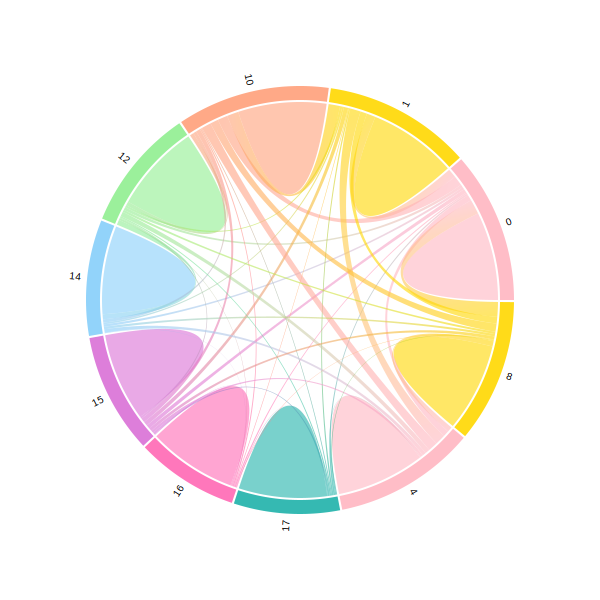

In [81]:
### CHORD PLOT PARA HCC + PANCREÁTICO ###
adata_filtrado_hcc_pancreatic = adata_gex[(adata_gex.obs["Sample"].isin(hcc_pancreatic)) & 
                                          (~adata_gex.obs["leiden"].isin(clusters_excluir))]

filtered_airr_hcc_pancreatic = airr_data.loc[adata_filtrado_hcc_pancreatic.obs.index]
filtered_airr_hcc_pancreatic["leiden"] = adata_filtrado_hcc_pancreatic.obs["leiden"]

clusters_hcc_pancreatic = sorted(filtered_airr_hcc_pancreatic['leiden'].unique().astype(str))
clones_hcc_pancreatic = sorted(filtered_airr_hcc_pancreatic['clone_id'].unique())

presence_matrix_hcc_pancreatic = pd.DataFrame(0, index=clusters_hcc_pancreatic, columns=clones_hcc_pancreatic)
for cluster in clusters_hcc_pancreatic:
    clones_in_cluster = filtered_airr_hcc_pancreatic[filtered_airr_hcc_pancreatic['leiden'] == cluster]['clone_id'].unique()
    presence_matrix_hcc_pancreatic.loc[str(cluster), clones_in_cluster] = 1

jaccard_distances_hcc_pancreatic = pdist(presence_matrix_hcc_pancreatic, metric='jaccard')
jaccard_matrix_hcc_pancreatic = 1 - squareform(jaccard_distances_hcc_pancreatic)
jaccard_df_hcc_pancreatic = pd.DataFrame(jaccard_matrix_hcc_pancreatic, index=clusters_hcc_pancreatic, columns=clusters_hcc_pancreatic)

adjacency_matrix_hcc_pancreatic = jaccard_df_hcc_pancreatic.to_numpy()

fig_hcc_pancreatic = ocd.Chord(adjacency_matrix_hcc_pancreatic, labels=clusters_hcc_pancreatic)
fig_hcc_pancreatic.figsize = (1500, 1500)
fig_hcc_pancreatic.label_fontsize = 30
fig_hcc_pancreatic.label_font = "Arial Bold"
fig_hcc_pancreatic.label_distance = 50
fig_hcc_pancreatic.label_rotation = 0
fig_hcc_pancreatic.padding = 100

print("Chord Plot - HCC + Pancreatic Tumors")
fig_hcc_pancreatic.show()

### Algunos marcadores

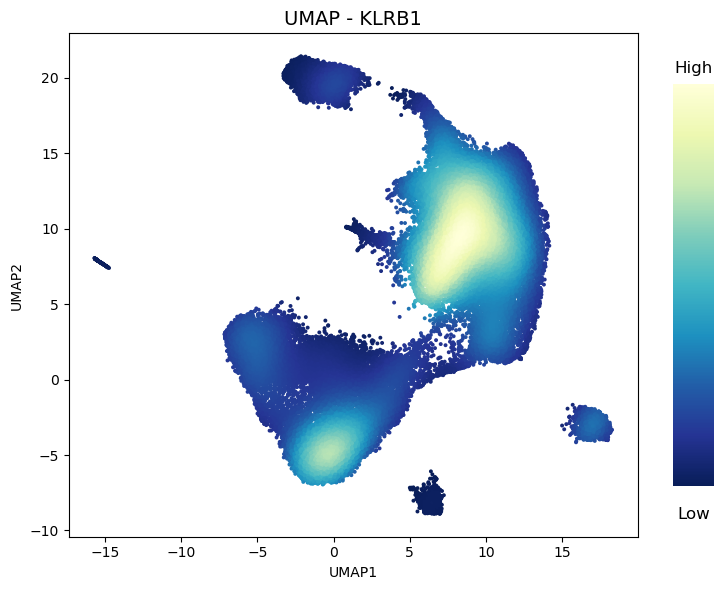

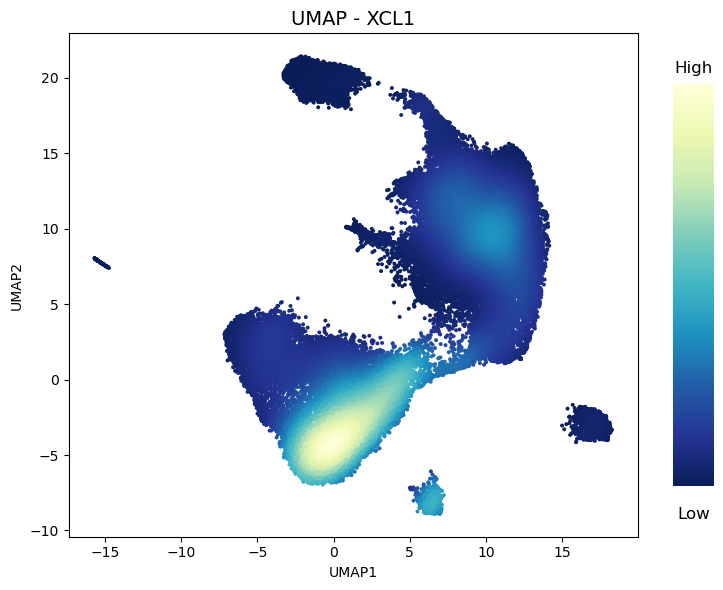

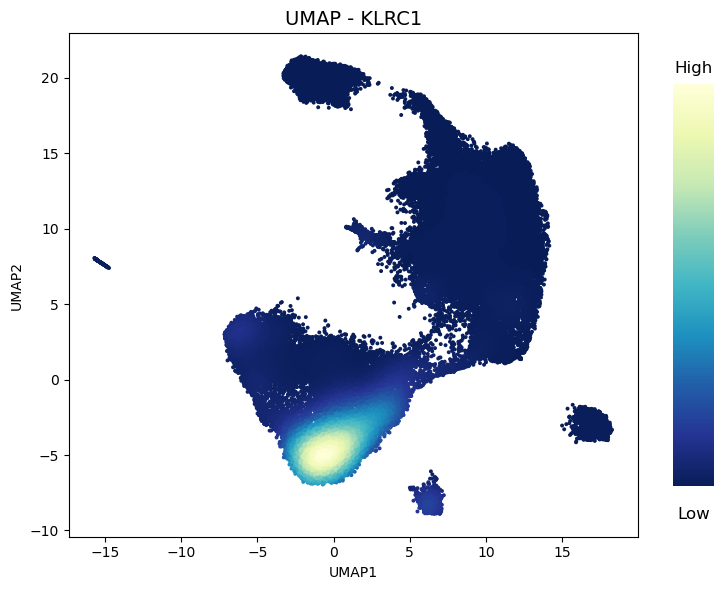

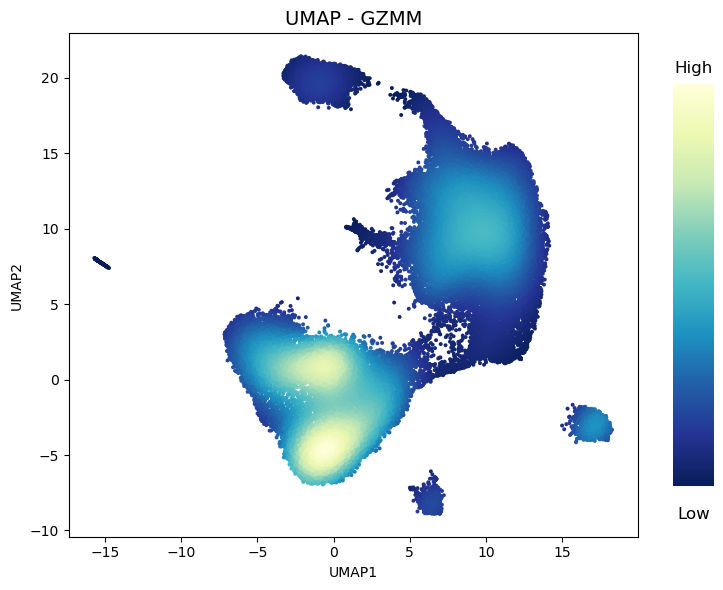

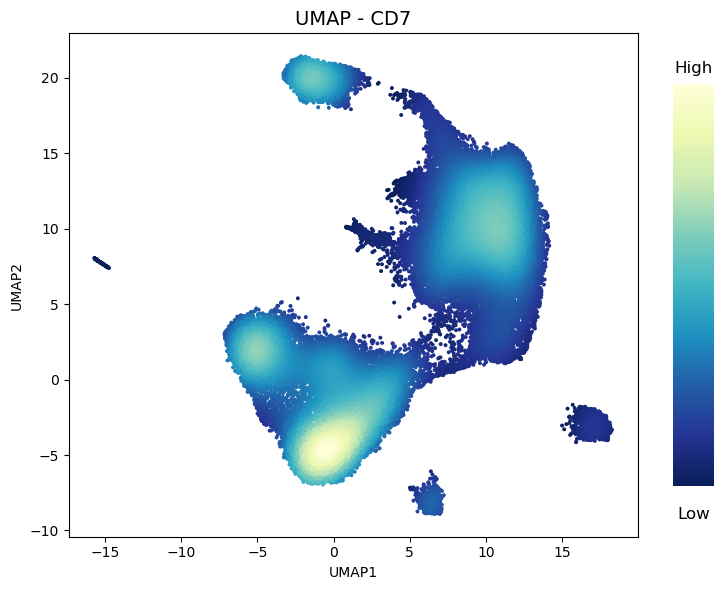

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Lista de genes a analizar
genes = ['KLRB1','XCL1','KLRC1','GZMM','CD7']

# Obtener las coordenadas UMAP
umap_coords = mdata.mod['gex'].obsm['X_umap']

# Recorrer cada gen y representarlo en un UMAP independiente
for gene in genes:
    # Verificar que el gen esté en var_names
    if gene in mdata.mod['gex'].var_names:
        # Obtener los valores de expresión del gen
        gene_expr = mdata.mod['gex'][:, gene].X.toarray().flatten()  # Expresión génica
    else:
        print(f"El gen {gene} no se encuentra en los datos.")
        continue

    # Calcular la densidad de puntos
    xy = np.vstack([umap_coords[:, 0], umap_coords[:, 1]])
    z = gaussian_kde(xy, weights=gene_expr)(xy)

    # Crear una nueva figura para cada gen
    fig, ax = plt.subplots(figsize=(8, 6))

    # Crear scatter plot para el gen
    scatter = ax.scatter(umap_coords[:, 0], umap_coords[:, 1], c=z, cmap='YlGnBu_r', s=8, edgecolor='none')
    ax.set_title(f'UMAP - {gene}', fontsize=14)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')

    # Agregar la barra de color
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.8, aspect=10)
    cbar.set_ticks([])  # Quitar los números
    cbar.outline.set_visible(False)  # Eliminar el borde de la barra de color
    cbar.ax.text(0.5, 1.02, 'High', ha='center', va='bottom', fontsize=12, transform=cbar.ax.transAxes)
    cbar.ax.text(0.5, -0.05, 'Low', ha='center', va='top', fontsize=12, transform=cbar.ax.transAxes)

    # Ajustar la visualización
    plt.tight_layout()

    # Mostrar la imagen de cada gen por separado
    plt.show()
    plt.pause(0.5)  # Pausa para asegurar que se renderiza bien antes de pasar al siguiente


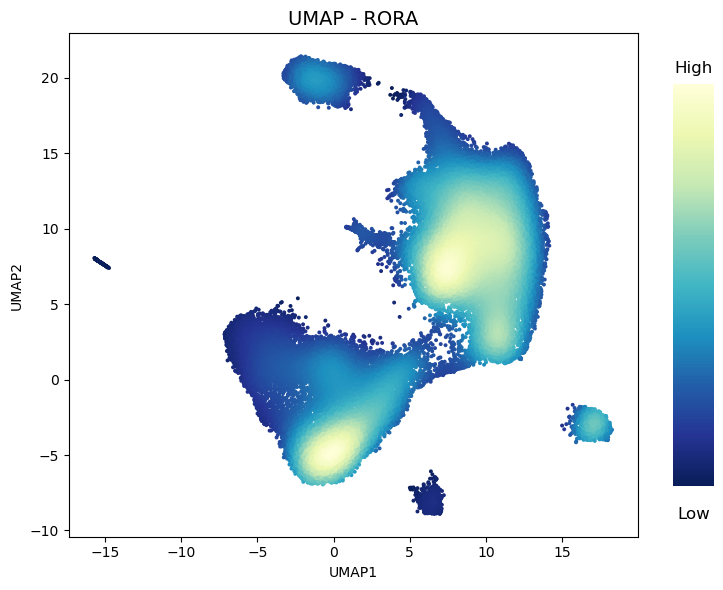

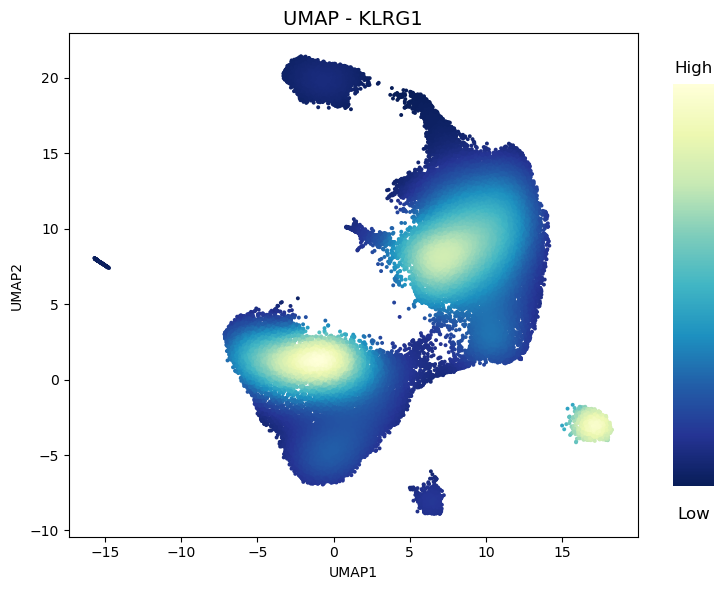

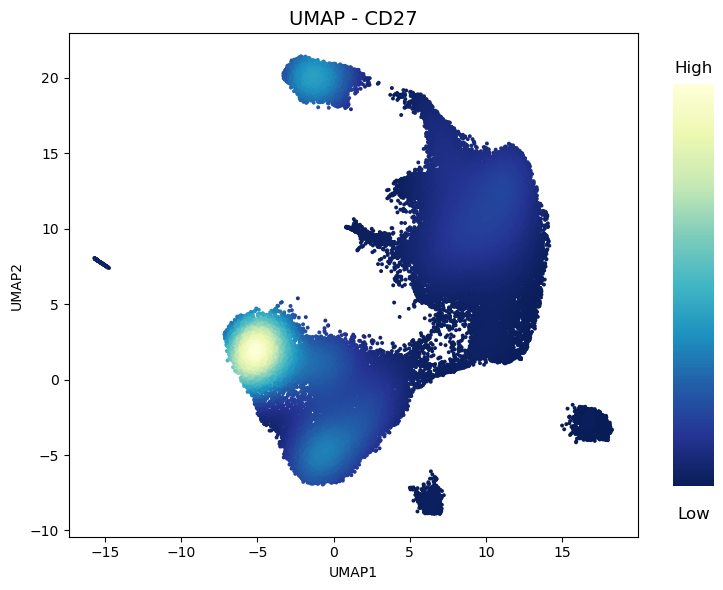

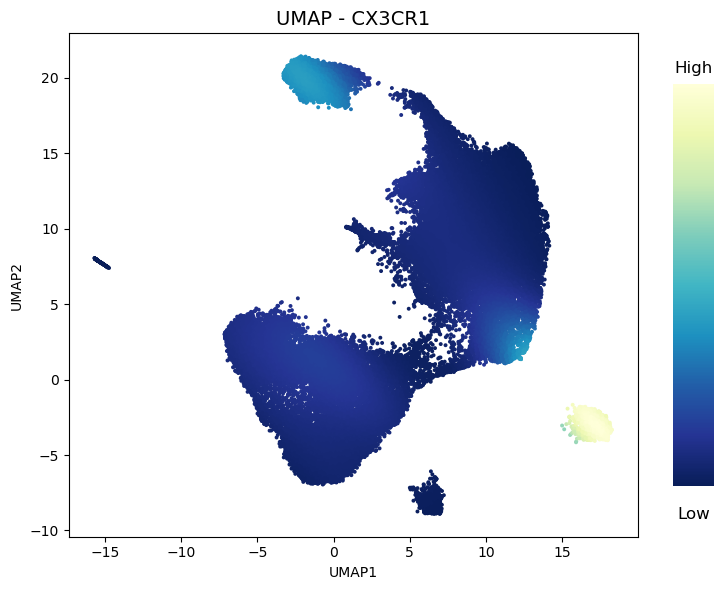

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Lista de genes a analizar
genes = ['RORA','KLRG1','CD27','CX3CR1']

# Obtener las coordenadas UMAP
umap_coords = mdata.mod['gex'].obsm['X_umap']

# Recorrer cada gen y representarlo en un UMAP independiente
for gene in genes:
    # Verificar que el gen esté en var_names
    if gene in mdata.mod['gex'].var_names:
        # Obtener los valores de expresión del gen
        gene_expr = mdata.mod['gex'][:, gene].X.toarray().flatten()  # Expresión génica
    else:
        print(f"El gen {gene} no se encuentra en los datos.")
        continue

    # Calcular la densidad de puntos
    xy = np.vstack([umap_coords[:, 0], umap_coords[:, 1]])
    z = gaussian_kde(xy, weights=gene_expr)(xy)

    # Crear una nueva figura para cada gen
    fig, ax = plt.subplots(figsize=(8, 6))

    # Crear scatter plot para el gen
    scatter = ax.scatter(umap_coords[:, 0], umap_coords[:, 1], c=z, cmap='YlGnBu_r', s=8, edgecolor='none')
    ax.set_title(f'UMAP - {gene}', fontsize=14)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')

    # Agregar la barra de color
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.8, aspect=10)
    cbar.set_ticks([])  # Quitar los números
    cbar.outline.set_visible(False)  # Eliminar el borde de la barra de color
    cbar.ax.text(0.5, 1.02, 'High', ha='center', va='bottom', fontsize=12, transform=cbar.ax.transAxes)
    cbar.ax.text(0.5, -0.05, 'Low', ha='center', va='top', fontsize=12, transform=cbar.ax.transAxes)

    # Ajustar la visualización
    plt.tight_layout()

    # Mostrar la imagen de cada gen por separado
    plt.show()
    plt.pause(0.5)  # Pausa para asegurar que se renderiza bien antes de pasar al siguiente

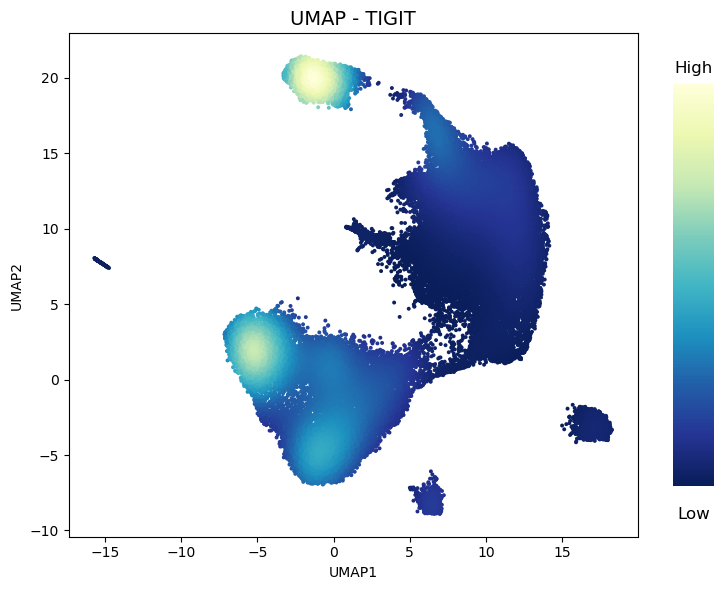

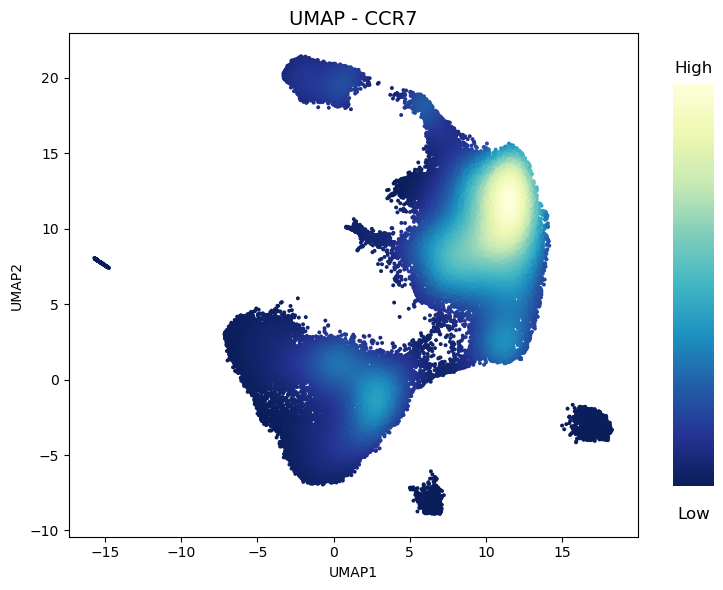

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Lista de genes a analizar
genes = ['TIGIT','CCR7']

# Obtener las coordenadas UMAP
umap_coords = mdata.mod['gex'].obsm['X_umap']

# Recorrer cada gen y representarlo en un UMAP independiente
for gene in genes:
    # Verificar que el gen esté en var_names
    if gene in mdata.mod['gex'].var_names:
        # Obtener los valores de expresión del gen
        gene_expr = mdata.mod['gex'][:, gene].X.toarray().flatten()  # Expresión génica
    else:
        print(f"El gen {gene} no se encuentra en los datos.")
        continue

    # Calcular la densidad de puntos
    xy = np.vstack([umap_coords[:, 0], umap_coords[:, 1]])
    z = gaussian_kde(xy, weights=gene_expr)(xy)

    # Crear una nueva figura para cada gen
    fig, ax = plt.subplots(figsize=(8, 6))

    # Crear scatter plot para el gen
    scatter = ax.scatter(umap_coords[:, 0], umap_coords[:, 1], c=z, cmap='YlGnBu_r', s=8, edgecolor='none')
    ax.set_title(f'UMAP - {gene}', fontsize=14)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')

    # Agregar la barra de color
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.8, aspect=10)
    cbar.set_ticks([])  # Quitar los números
    cbar.outline.set_visible(False)  # Eliminar el borde de la barra de color
    cbar.ax.text(0.5, 1.02, 'High', ha='center', va='bottom', fontsize=12, transform=cbar.ax.transAxes)
    cbar.ax.text(0.5, -0.05, 'Low', ha='center', va='top', fontsize=12, transform=cbar.ax.transAxes)

    # Ajustar la visualización
    plt.tight_layout()

    # Mostrar la imagen de cada gen por separado
    plt.show()
    plt.pause(0.5)  # Pausa para asegurar que se renderiza bien antes de pasar al siguiente